## Mục Đích Phân Cụm và Câu Hỏi Nghiên Cứu

**Mục tiêu chính:** Xác định và phân tích các phân khúc sản phẩm trên Amazon dựa trên mối quan hệ giữa các yếu tố: đặc tính/tính năng mô tả của sản phẩm, giá bán và đánh giá từ người dùng. Qua đó, tìm hiểu xem các sản phẩm đang được định vị như thế nào trên thị trường về mặt "giá trị" và "chất lượng".

**Tại sao chọn các thuộc tính này?**

* **`about_product` (Mô tả sản phẩm - Dữ liệu Văn bản):**
    * **Đóng góp:** Cung cấp thông tin chi tiết về các tính năng, lợi ích, công dụng, và đặc điểm kỹ thuật của sản phẩm. Đây là yếu tố then chốt để hiểu được "giá trị nội tại" hoặc "chất lượng được quảng bá" của sản phẩm.
    * **Vai trò trong phân cụm:** Giúp nhóm các sản phẩm có bộ tính năng tương tự hoặc hướng đến cùng một nhu cầu sử dụng.

* **`discounted_price` / `actual_price` (Giá sản phẩm - Dữ liệu Số):**
    * **Đóng góp:** Phản ánh chi phí mà người tiêu dùng phải bỏ ra để sở hữu sản phẩm.
    * **Vai trò trong phân cụm:** Là một trục quan trọng để so sánh "giá trị nhận được" so với "chi phí bỏ ra".

* **`rating` (Đánh giá trung bình - Dữ liệu Số):**
    * **Đóng góp:** Thể hiện mức độ hài lòng của khách hàng đã sử dụng sản phẩm, một thước đo quan trọng về "chất lượng cảm nhận" hoặc "chất lượng thực tế" sau khi trải nghiệm.
    * **Vai trò trong phân cụm:** Giúp xác định mức độ chấp nhận và yêu thích của thị trường đối với sản phẩm.

**Các câu hỏi mà việc phân cụm với các thuộc tính này nhằm trả lời:**

1.  **Phân khúc sản phẩm theo giá trị và chất lượng:**
    * Có thể xác định được các nhóm sản phẩm nào mang lại **"giá trị tốt nhất"** (ví dụ: nhiều tính năng được mô tả, rating cao nhưng giá cả phải chăng) không?
    * Có thể phân biệt được nhóm sản phẩm **"cao cấp"** (ví dụ: mô tả nhiều tính năng vượt trội, rating rất cao, và giá cao tương xứng) với nhóm sản phẩm **"cơ bản/giá rẻ"** (ví dụ: mô tả ít tính năng, rating ở mức chấp nhận được, giá thấp) không?

2.  **Phát hiện các trường hợp đặc biệt về định giá và cảm nhận chất lượng:**
    * Có nhóm sản phẩm nào dường như được **"định giá quá cao"** (ví dụ: mô tả nhiều tính năng nhưng rating thực tế thấp so với mức giá) không?
    * Có thể tìm ra những **"món hời tiềm ẩn"** (ví dụ: rating tốt, giá thấp, nhưng có thể phần mô tả chưa làm nổi bật hết các tính năng giá trị) không?

3.  **Hiểu cấu trúc thị trường:**
    * Các cụm sản phẩm hình thành có tương quan như thế nào giữa ba yếu tố: tính năng mô tả, giá cả, và đánh giá của người dùng? (Ví dụ: Một cụm có thể là "các sản phẩm điện tử với mô tả nhiều tính năng, giá cao và rating rất tốt", trong khi một cụm khác là "phụ kiện giá rẻ, mô tả đơn giản, rating ở mức khá").

Bằng cách phân cụm dựa trên sự kết hợp của ba thuộc tính này, chúng ta kỳ vọng sẽ khám phá ra những phân khúc sản phẩm có ý nghĩa, từ đó cung cấp cái nhìn sâu sắc hơn về chiến lược sản phẩm và định vị giá trên thị trường.

In [479]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [480]:
df = pd.read_csv("data/amazon.csv")

# 1. MÔ TẢ TẬP DỮ LIỆU 

### 📦 Thông tin về tập Amazon Sales Dataset
#### 🛍️ Thông tin về sản phẩm

| Trường              | Mô tả                                                                 |
|---------------------|----------------------------------------------------------------------|
| `product_id`        | Mã định danh duy nhất của sản phẩm.                                  |
| `product_name`      | Tên sản phẩm.                                                        |
| `category`          | Danh mục sản phẩm.                                                   |
| `discounted_price`  | Giá sau khi giảm (hiển thị với khách hàng).                          |
| `actual_price`      | Giá gốc của sản phẩm trước khi giảm giá.                             |
| `discount_percentage` | Phần trăm giảm giá được tính dựa trên `actual_price`.              |
| `rating`            | Điểm đánh giá trung bình từ người dùng (thang điểm 5).               |
| `rating_count`      | Số lượng người đã đánh giá sản phẩm.                                 |
| `about_product`     | Mô tả ngắn hoặc thông tin kỹ thuật về sản phẩm.                      |
| `img_link`          | Link hình ảnh đại diện của sản phẩm.                                 |
| `product_link`      | Link tới trang chính thức của sản phẩm trên website (Amazon hoặc khác). |

#### 🧑 Thông tin đánh giá từ người dùng

| Trường           | Mô tả                                                                 |
|------------------|----------------------------------------------------------------------|
| `user_id`        | Mã định danh của người dùng đã đánh giá sản phẩm.                    |
| `user_name`      | Tên người dùng đã viết đánh giá. Có thể là nickname hoặc tên thật.   |
| `review_id`      | Mã định danh của đánh giá, dùng để phân biệt từng bài review.        |
| `review_title`   | Tiêu đề ngắn gọn của đánh giá, thể hiện ý chính.                     |
| `review_content` | Nội dung chi tiết của bài đánh giá từ người dùng.                    |

# 2. ĐÁNH GIÁ TẬP DỮ LIỆU 

In [481]:
print("Năm dòng đầu tiên của DataFrame thô:")
df.head()

Năm dòng đầu tiên của DataFrame thô:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [482]:
print(f"\nKích thước của DataFrame thô: {df.shape[0]} dòng, {df.shape[1]} cột")


Kích thước của DataFrame thô: 1465 dòng, 16 cột


In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Ta thấy dữ liệu gồm có 1465 dòng với 16 cột dữ liệu dưới dạng object.

Các cột discounted_price, actual_price, discount_percentage, rating, rating_count cần chuyển về  dạng số:
| **Cột**              | **Kiểu mới** | **Ghi chú**                                                            |
|----------------------|--------------|------------------------------------------------------------------------|
| `discounted_price`   | `float`      | Cần loại bỏ ký tự `₹`, dấu phẩy nếu có trước khi chuyển đổi kiểu      |
| `actual_price`       | `float`      | Cần loại bỏ ký tự `₹`, dấu phẩy nếu có trước khi chuyển đổi kiểu      |
| `rating`             | `float`      | Đã ở dạng số thập phân, chỉ cần ép kiểu nếu cần                        |
| `discount_percentage`| `float`        | Cần loại bỏ dấu `%` trước khi ép kiểu                                 |
| `rating_count`       | `int`        | Loại bỏ dấu phẩy hàng nghìn (`,`) trước khi ép kiểu                   |

Các cột product_name, category, about_product, review_title, review_content cần xử lý dạng văn bản, rút gọn nội dung, tên sản phẩm/ danh mục: 


| **Cột**             | **Cách xử lý**                                                                                                                                                                  |
|---------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `product_name`      | Rút gọn tên sản phẩm, loại bỏ các ký tự đặc biệt                                                                                 |
| `category`          | Đây là chuỗi phân cấp danh mục, ví dụ: `Computers&Accessories\|Accessories&Peripherals\|...\|USBCables`. Có thể xử lý theo các cách:                                          |
|                     | - Trích xuất danh mục **cụ thể nhất** (ví dụ: `USBCables`)                                                                                                                      |
|                     | - Kết hợp danh mục **chính và cuối cùng** (ví dụ: `Computers&Accessories - USBCables`)                                                                                          |
|                     | - Hoặc tách thành **các cột riêng biệt** theo từng cấp phân loại (ví dụ: `cat_lvl_1`, `cat_lvl_2`, ...)                                                                        |
| `about_product`     | Rút gọn nội dung mô tả hoặc áp dụng các kỹ thuật xử lý ngôn ngữ tự nhiên (NLP): loại bỏ từ dừng, chuẩn hoá văn bản, tóm tắt nội dung.                                          |
| `review_title`      | Làm sạch dấu câu, loại bỏ trùng lặp, chuẩn hoá chữ thường/hoa.                                  |
| `review_content`    | Tương tự như `review_title`: làm sạch, chuẩn hoá, có thể dùng `tóm tắt`, `TF-IDF`, `Word2Vec` |

In [484]:
print("\nGiá trị null ở các cột:")
df.isnull().sum()


Giá trị null ở các cột:


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [485]:
# Phần trăm giá trị null ở các cột
print("\nPhần trăm giá trị null ở các cột:")
print(df.isnull().mean().round(4) * 100)


Phần trăm giá trị null ở các cột:
product_id             0.00
product_name           0.00
category               0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
rating_count           0.14
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64


Có cột rating_count có tỷ lệ % Null là 0.14%, có thể xóa/bỏ đi được. 


# 3. TIỀN XỬ LÝ DỮ LIỆU 

## 3.1. Tiền xử lý dữ liệu số 

In [486]:
# Tạo một bản sao để thao tác an toàn
df_processed = df.copy()

# Loại bỏ các ký tự không phải số khỏi các cột giá
price_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']
for col in price_columns:
    df_processed[col] = df_processed[col].str.replace('₹', '', regex=False)
    df_processed[col] = df_processed[col].str.replace(',', '', regex=False)
    df_processed[col] = df_processed[col].str.replace('%', '', regex=False)

print("Đã loại bỏ ký tự khỏi các cột giá.")

Đã loại bỏ ký tự khỏi các cột giá.


In [487]:
df_processed.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [488]:
# Chuyển đổi các cột sang dạng số
numeric_columns = ['discounted_price', 'actual_price', 'rating', 'discount_percentage', 'rating_count']
for col in numeric_columns:
    df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
df_processed['discount_percentage'] = df_processed['discount_percentage']/100
df_processed['rating_count'] = df_processed['rating_count'].astype('Int64')
print("Đã chuyển các cột sang kiểu dữ liệu số.")

Đã chuyển các cột sang kiểu dữ liệu số.


In [489]:
# Tìm dữ liệu bị lỗi trong cột 'rating'
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

Tra cứu điểm đánh giá của sản phẩm này trên Amazon bằng cách tìm kiếm product_id được cung cấp trên trang chính thức của họ (amazon.in).

Điểm đánh giá là 3.9. Vì vậy, đánh giá sản phẩm này là 3.9.

In [490]:
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [491]:
# In thông tin tổng quan của DataFrame để kiểm tra
print("Thông tin DataFrame sau khi chuyển đổi kiểu dữ liệu:")
df_processed.info()
print(df_processed.head(10))

Thông tin DataFrame sau khi chuyển đổi kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   Int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null 

## 3.2. Tiền xử lý dữ liệu văn bản 

In [492]:
import nltk

# Tải các gói cần thiết cho việc xử lý ngôn ngữ
nltk.download('punkt')      # Dùng cho Tokenization
nltk.download('stopwords')  # Chứa danh sách từ dừng
nltk.download('wordnet')    # Dùng cho Lemmatization
nltk.download('punkt_tab')

print("Đã tải xong các tài nguyên NLTK.")

Đã tải xong các tài nguyên NLTK.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### Xử lý tên sản phẩm - rút gọn và loại bỏ ký tự đặc biệt

In [493]:
def clean_product_name(name):
    if not isinstance(name, str):
        return name
    name = name.replace('&', ' and ')
    # Loại bỏ các ký tự đặc biệt
    # Sử dụng biểu thức chính quy (regex) để loại bỏ các ký tự đặc biệt khỏi chuỗi name, giữ lại chỉ chữ cái, số và khoảng trắng.
    cleaned_name = re.sub(r'[^\w\s]', ' ', name)
    # Loại bỏ khoảng trắng thừa
    cleaned_name = re.sub(r'\s+', ' ', cleaned_name).strip()
    # Rút gọn tên sản phẩm nếu quá dài
    return cleaned_name[:50] + '...' if len(cleaned_name) > 50 else cleaned_name
# Áp dụng hàm làm sạch tên sản phẩm
df_processed['product_name'] = df_processed['product_name'].apply(clean_product_name)

#### Xử lý tên danh mục sản phẩm

In [494]:
# Hàm danh mục chính 
def extract_main_category(category):
    if not isinstance(category, str):
        return category
    categories = category.split('|')
    return categories[0] if categories else ''
# Danh mục cụ thể nhất (cuối cùng)
def extract_specific_category(category):
    if not isinstance(category, str):
        return category
    categories = category.split('|')
    return categories[-1] if categories else ''
# Áp dụng hàm để tạo cột danh mục chính và cụ thể nhất
df_processed['main_category'] = df_processed['category'].apply(extract_main_category)
df_processed['specific_category'] = df_processed['category'].apply(extract_specific_category)
# Làm sach cột danh mục
df_processed['main_category'] = df_processed['main_category'].apply(clean_product_name)
df_processed['specific_category'] = df_processed['specific_category'].apply(clean_product_name)

In [495]:
df_processed.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,specific_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers and Accessories,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W 3A Fast Charging 1 5m ...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers and Accessories,USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable and Data Sync...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers and Accessories,USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type C and Micro USB...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers and Accessories,USBCables
4,B08CF3B7N1,Portronics Konnect L 1 2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers and Accessories,USBCables


#### Xử lý thuộc tính text - rút gọn và loại bỏ ký tự đặc biệt

In [496]:
# In 20 dòng đầu của các thuộc tính văn bản
text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    print(f"\n20 dòng đầu của cột {col}:")
    for i, val in enumerate(df_processed[col].head(5)):
        print(f"{i+1}. {val}")




20 dòng đầu của cột about_product:
1. High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.


In [497]:
def clean_text(text):
    if not isinstance(text, str):
        return text
    text = text.lower()
    text = re.sub(r'&+', ' and ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.IGNORECASE)
    text = re.sub(r'm\s*media\s*amazon\s*com\s*images\S*', '', text, flags=re.IGNORECASE)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Áp dụng cho các cột văn bản
text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    df_processed[col] = df_processed[col].apply(clean_text)

In [498]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return text
    # Tokenization
    tokens = word_tokenize(text)
    # Loại bỏ stop word và chỉ giữ lại từ chữ cái
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    # Ghép lại thành chuỗi
    return ' '.join(tokens)

text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    df_processed[col] = df_processed[col].apply(preprocess_text)

In [499]:
# In 5 dòng đầu của các thuộc tính văn bản
text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    print(f"\n5 dòng đầu của cột {col}:")
    for i, val in enumerate(df_processed[col].head(5)):
        print(f"{i+1}. {val}")


5 dòng đầu của cột about_product:
1. high compatibility compatible iphone x xsmax xr iphone plus iphone plus iphone plus iphone plus iphone se ipad pro ipad air ipad mini ipod ipod touch apple device fast charge data sync charge sync simultaneously rapid speed compatible charging adaptor multi port charging station power bank durability durable nylon braided design premium aluminum housing toughened nylon fiber wound tightly around cord lending superior durability adding bit flexibility high security level designed fully protect device damaging excessive current copper core thick multilayer shielding anti interference protective circuit equipment warranty month warranty friendly customer service ensures long time enjoyment purchase meet question problem please hesitate contact u
2. compatible type c enabled device android smartphone mi samsung oppo vivo realme oneplus etc tablet laptop macbook chromebook etc support quick charging unbreakable made special braided outer rugged interior

## 3.3. Làm sạch dữ liệu 

In [500]:
# Tính giá trị trung vị của cột 'rating'
median_rating = df_processed['rating'].median()

# Dùng giá trị trung vị để lấp vào ô bị thiếu (NaN)
df_processed['rating'].fillna(median_rating, inplace=True)

print(f"Đã lấp đầy giá trị thiếu bằng trung vị: {median_rating}")
print("\nKiểm tra lại thông tin DataFrame:")
df_processed.info()

Đã lấp đầy giá trị thiếu bằng trung vị: 4.1

Kiểm tra lại thông tin DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   Int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link 

C:\Users\HP\AppData\Local\Temp\ipykernel_18948\486876630.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['rating'].fillna(median_rating, inplace=True)


In [501]:
# Xử lý dữ liệu trùng lặp
df_processed.duplicated().sum()

0

Không có dữ liệu trùng lặp 

# 4. KHÁM PHÁ VÀ PHÂN TÍCH DỮ LIỆU (EDA)

## 4.1. Thống kê, phân phối dữ liệu 

In [502]:
df_processed.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.0
mean,3125.310874,5444.990635,0.476915,4.096587,18295.541353
std,6944.304394,10874.826864,0.216359,0.291574,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.0
25%,325.000000,800.000000,0.320000,4.000000,1186.0
50%,799.000000,1650.000000,0.500000,4.100000,5179.0
75%,1999.000000,4295.000000,0.630000,4.300000,17336.5
max,77990.000000,139900.000000,0.940000,5.000000,426973.0


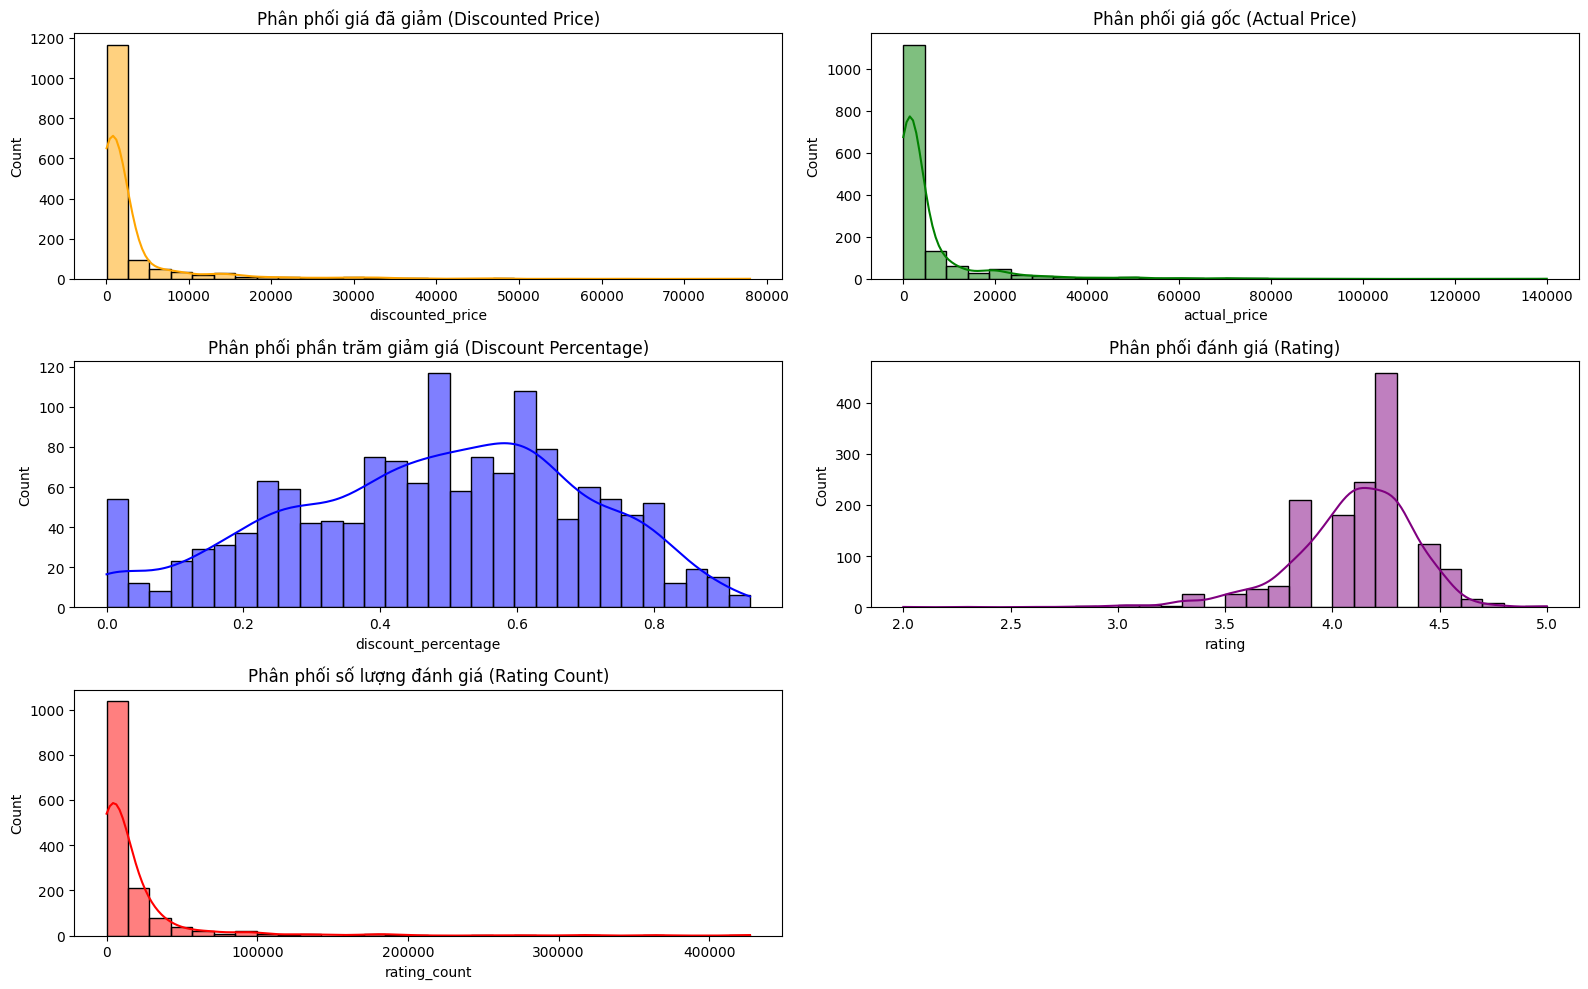

In [503]:
# Trực quan hóa phân phối của các cột số 
plt.figure(figsize=(16,10))
plt.subplot(3, 2, 1)
sns.histplot(df_processed['discounted_price'], bins=30, kde=True, color='orange')
plt.title('Phân phối giá đã giảm (Discounted Price)')
plt.subplot(3, 2, 2)
sns.histplot(df_processed['actual_price'], bins=30, kde=True, color='green')
plt.title('Phân phối giá gốc (Actual Price)')
plt.subplot(3,2,3)
sns.histplot(df_processed['discount_percentage'], bins=30, kde=True, color='blue')
plt.title('Phân phối phần trăm giảm giá (Discount Percentage)')
plt.subplot(3, 2, 4)
sns.histplot(df_processed['rating'], bins=30, kde=True, color='purple')
plt.title('Phân phối đánh giá (Rating)')
plt.subplot(3, 2, 5)
sns.histplot(df_processed['rating_count'], bins=30, kde=True, color='red')
plt.title('Phân phối số lượng đánh giá (Rating Count)')
plt.tight_layout()
plt.show()


**Các thuộc tính số đều có phân phối không chuẩn:**
- Discounted_price và actual_price có phân phối lệch phải: cho thấy giá gốc và giá đã giảm nằm ở mức thấp, nhiều nhất ở khoảng dưới 2000 Rupee (~$23/600.000VND).
- Phần trăm giảm giá (Discount percentage) phân phối trải rộng, tập trung nhiều nhất ở khoảng 40-60% cho một sản phẩm.
- Rating lại có phân phối lệch trái: cho thấy điểm đánh giá cho các sản phẩm khá cao, chủ yếu ở mức 3.5 - 4.5. 
- Số đánh giá cho mỗi sản phẩm có phân phối lệch phải: khoảng dưới 100.000 đánh giá cho một sản phẩm, một số ít có số lượng đánh giá cao.  


In [504]:
df_processed.describe(include='object')

,product_id,product_name,category,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,specific_category
count,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1290,211,1271,1194,1194,1194,1194,1194,1412,1465,9,207
top,B07JW9H4J1,Ambrane Unbreakable 60W 3A Fast Charging 1 5m ...,Computers&Accessories|Accessories&Peripherals|...,charge sync function cable come charging data ...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...",worked iphone work xr good one dull physical l...,worked iphone work iphone xr like still use wo...,https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Electronics,USBCables
freq,3,7,233,6,10,10,10,10,10,3,1,526,233


- Danh mục sản phẩm chính xuất hiện nhiều nhất là Electronics và loại USBCables. 
- Các danh mục sản phẩm duy nhất: 9
- Các danh mục cụ thể nhất duy nhất: 207
- Có 1290 loại sản phẩm khác nhau 

## 4.2. Grouping and Aggregation

### Đánh giá trung bình của các danh mục sản phẩm 

In [505]:
# Nhóm theo danh mục chính và tính trung bình của cột 'rating'
grouped_df = df_processed.groupby('main_category')['rating'].mean()
print("\nTrung bình đánh giá theo danh mục chính:")
print(grouped_df.sort_values(ascending=False).head(10))



Trung bình đánh giá theo danh mục chính:
main_category
OfficeProducts               4.309677
Toys and Games               4.300000
HomeImprovement              4.250000
Computers and Accessories    4.154967
Electronics                  4.081749
Home and Kitchen             4.040848
Health and PersonalCare      4.000000
MusicalInstruments           3.900000
Car and Motorbike            3.800000
Name: rating, dtype: float64


- Các đánh giá cao nhất thuộc về danh mục sản phẩm văn phòng phẩm, đồ chơi và games.
- Đồ điện tử, danh mục sản phẩm cho nhà bếp, sức khỏe đánh giá nằm ở mức trung bình.
- Nhạc cụ và các loại xe mua qua sàn thương mại Amazon lại có đánh giá trung bình thấp. 

### Top 10 sản phẩm có số lượng đánh giá nhiều nhất ở các danh mục sản phẩm 

In [506]:
product_gr_cate_rating_count = df_processed.groupby(['main_category', 'product_name'])['rating_count'].sum().reset_index()
product_gr_cate_rating_count = product_gr_cate_rating_count.sort_values(by='rating_count', ascending=False)
print("\nSố lượng đánh giá theo danh mục chính và tên sản phẩm:")
product_gr_cate_rating_count.head(10)


Số lượng đánh giá theo danh mục chính và tên sản phẩm:


,main_category,product_name,rating_count
403,Electronics,AmazonBasics Flexible Premium HDMI Cable Black...,853945
768,Electronics,boAt Bassheads 100 in Ear Wired Earphones with...,727426
499,Electronics,JBL C100SI Wired In Ear Headphones with Mic JB...,577766
395,Electronics,Amazon Basics High Speed HDMI Cable 6 Feet 2 P...,426973
396,Electronics,Amazon Basics High Speed HDMI Cable 6 Feet Sup...,426973
342,Computers and Accessories,boAt Deuce USB 300 2 in 1 Type C and Micro USB...,377454
765,Electronics,boAt BassHeads 100 in Ear Wired Headphones wit...,363711
772,Electronics,boAt Bassheads 242 in Ear Wired Earphones with...,323356
621,Electronics,Redmi 9 Activ Carbon Black 4GB RAM 64GB Storag...,313836
623,Electronics,Redmi 9A Sport Coral Green 2GB RAM 32GB Storag...,313836


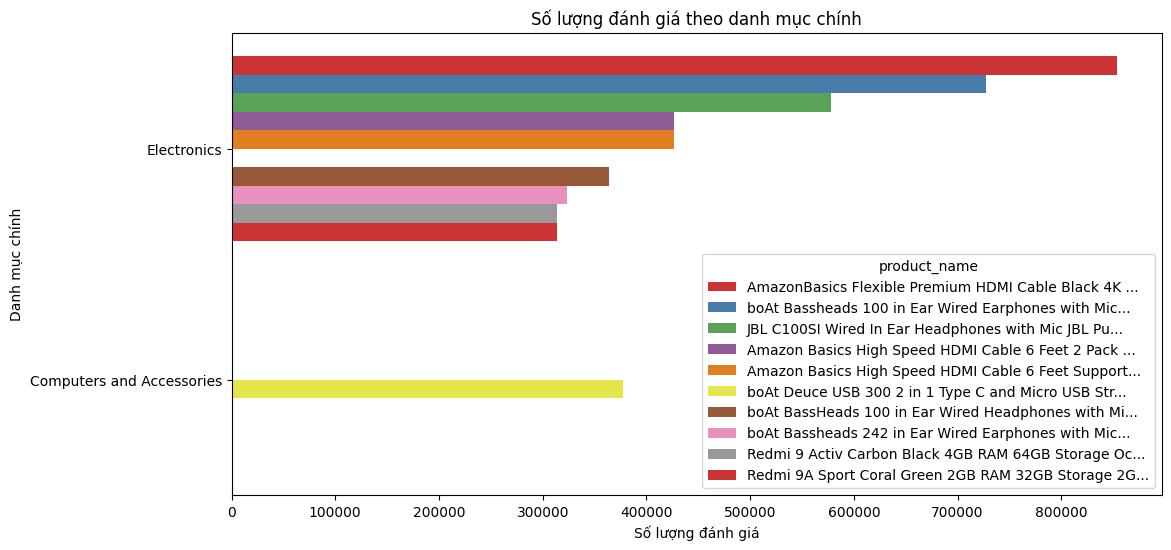

In [507]:
# Trực quan hóa số lượng đánh giá theo danh mục chính
plt.figure(figsize=(12, 6))
sns.barplot(x='rating_count', y='main_category', data=product_gr_cate_rating_count.head(10), palette='Set1', hue='product_name')
plt.title('Số lượng đánh giá theo danh mục chính')
plt.xlabel('Số lượng đánh giá')
plt.ylabel('Danh mục chính')
plt.show()

- Danh mục có số lượng sản phẩm được đánh giá nhiều nhất là Electronics, và điểm đánh giá trung bình cho danh mục này nằm ở mức 4.0 (Khá). Đứng đầu là Cáp AmazonBasics. 
- Danh mục có sản phẩm bán chạy nằm trong Top 10 là Computers and Accessories với sản phẩm Deuce USB. Và Computers and Accessories cũng có rating trung bình là 4.15 nằm ở mức khá. <br>
**--> Những sản phẩm có số lượng đánh giá cao nhất trong từng danh mục có thể được coi là các mặt hàng bán chạy tiềm năng, ngay cả khi không có dữ liệu bán hàng trực tiếp.**

# 5. XỬ LÝ OUTLIERS, NHIỄU 

In [508]:
df_raw = df_processed.copy()

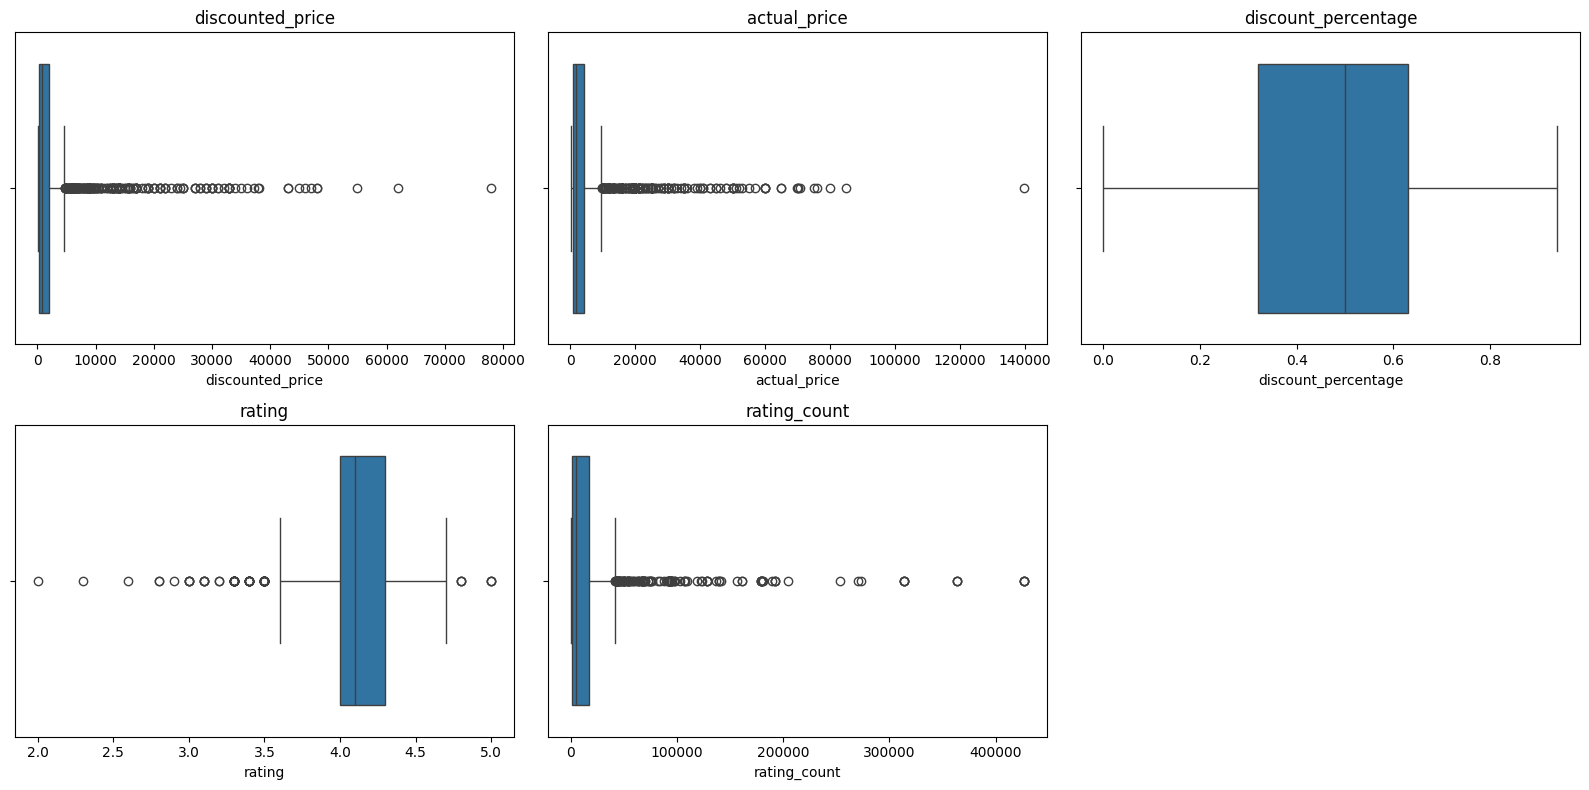

In [509]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Vẽ boxplot để kiểm tra outliers
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_processed[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [510]:
# Kiểm tra tỷ lệ outliers của từng biến số bằng phương pháp IQR
def compute_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

def outlier_ratio_iqr(series):
    lower, upper = compute_iqr_bounds(series)
    outliers = ((series < lower) | (series > upper)).sum()
    ratio = outliers / series.shape[0]
    return outliers, ratio

print("Tỷ lệ outliers theo từng biến số:")
for col in numeric_cols:
    outliers, ratio = outlier_ratio_iqr(df_processed[col])
    print(f"{col}: {outliers} outliers ({ratio:.2%})")

Tỷ lệ outliers theo từng biến số:
discounted_price: 217 outliers (14.81%)
actual_price: 213 outliers (14.54%)
discount_percentage: 0 outliers (0.00%)
rating: 74 outliers (5.05%)
rating_count: 141 outliers (9.62%)


In [511]:
def remove_outliers(df, column):
    upper = df[column].quantile(0.95)
    return df[(df[column] <= upper)]

for col in ['discounted_price']:
    before = df_processed.shape[0]
    df_processed = remove_outliers(df_processed, col)
    after = df_processed.shape[0]
    print(f" Đã loại bỏ {(before - after)} dòng ngoài khoảng 90% trung tâm ở cột '{col}'.")

 Đã loại bỏ 71 dòng ngoài khoảng 90% trung tâm ở cột 'discounted_price'.


# 6. CHUẨN HÓA DỮ LIỆU 


In [512]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_processed['rating_standard']= df_processed['rating'].copy()
df_raw['rating_standard'] = df_raw['rating'].copy()
df_raw = df_processed.copy()
numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_standard', 'rating_count']
df_processed[numeric_cols] = scale.fit_transform(df_processed[numeric_cols])
df_raw[numeric_cols] = scale.fit_transform(df_raw[numeric_cols])

In [513]:
df_processed['rating'].head()

0    4.2
1    4.0
2    3.9
3    4.2
4    4.2
Name: rating, dtype: float64

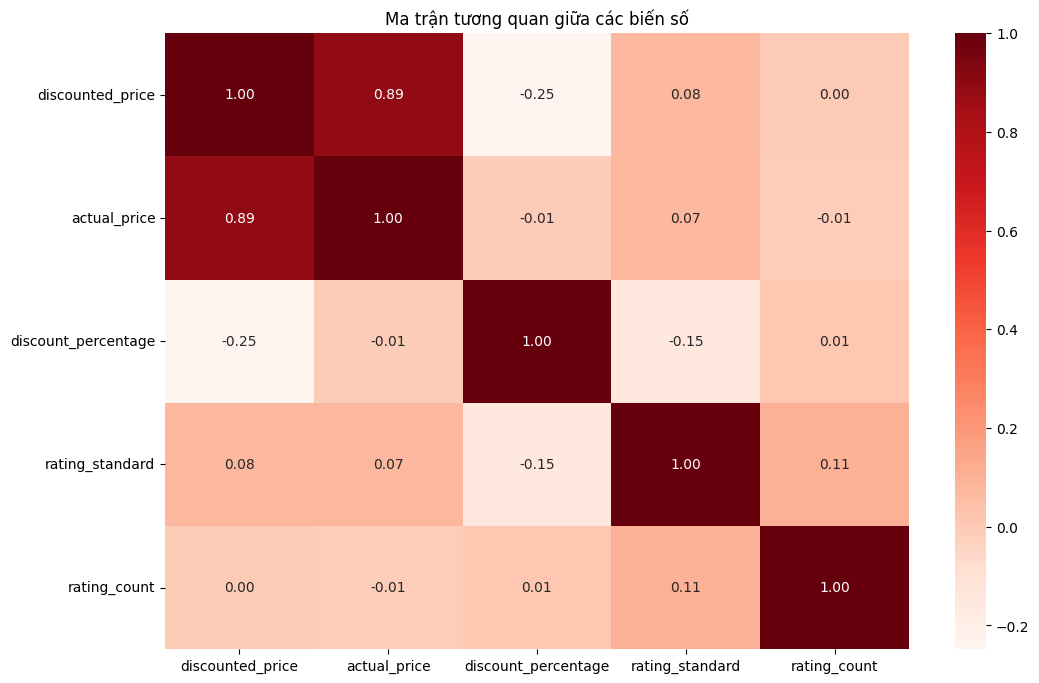

In [514]:
# Xem tương quan giữa các biến số
plt.figure(figsize=(12, 8))
sns.heatmap(df_processed[numeric_cols].corr(), annot=True, cmap='Reds', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

#### Chuẩn hóa văn bản

In [515]:
#!pip install sentence-transformers

In [516]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# TF-IDF với 1000 chiều
tfidf = TfidfVectorizer(max_features=1000)
about_embeddings = tfidf.fit_transform(df_processed['about_product'])
print("Đã hoàn thành việc huấn luyện TfidfVectorizer.")

total_unique_words = len(tfidf.vocabulary_)

print(f"Tổng số từ độc lập trong tập dữ liệu là: {total_unique_words}")


Đã hoàn thành việc huấn luyện TfidfVectorizer.
Tổng số từ độc lập trong tập dữ liệu là: 1000


In [517]:
svd = TruncatedSVD(n_components=300, random_state=42) 
about_embeddings_reduced = svd.fit_transform(about_embeddings)
print("Phương sai giải thích được sau khi SVD:", svd.explained_variance_ratio_.sum())


Phương sai giải thích được sau khi SVD: 0.8380305223886577


In [518]:
# TF-IDF với product_name
product_name_embeddings = tfidf.fit_transform(df_processed['product_name'])
product_name_embeddings_reduced = svd.fit_transform(product_name_embeddings)
print("Phương sai giải thích được sau khi SVD cho product_name:", svd.explained_variance_ratio_.sum())
# TF-IDF với review_title
review_title_embeddings = tfidf.fit_transform(df_processed['review_title'])
review_title_embeddings_reduced = svd.fit_transform(review_title_embeddings)
print("Phương sai giải thích được sau khi SVD cho review_title:", svd.explained_variance_ratio_.sum())
# TF-IDF với review_content
review_content_embeddings = tfidf.fit_transform(df_processed['review_content'])
review_content_embeddings_reduced = svd.fit_transform(review_content_embeddings)
print("Phương sai giải thích được sau khi SVD cho review_content:", svd.explained_variance_ratio_.sum())

Phương sai giải thích được sau khi SVD cho product_name: 0.8083730967894126
Phương sai giải thích được sau khi SVD cho review_title: 0.8124265702703231
Phương sai giải thích được sau khi SVD cho review_content: 0.8097475326669995


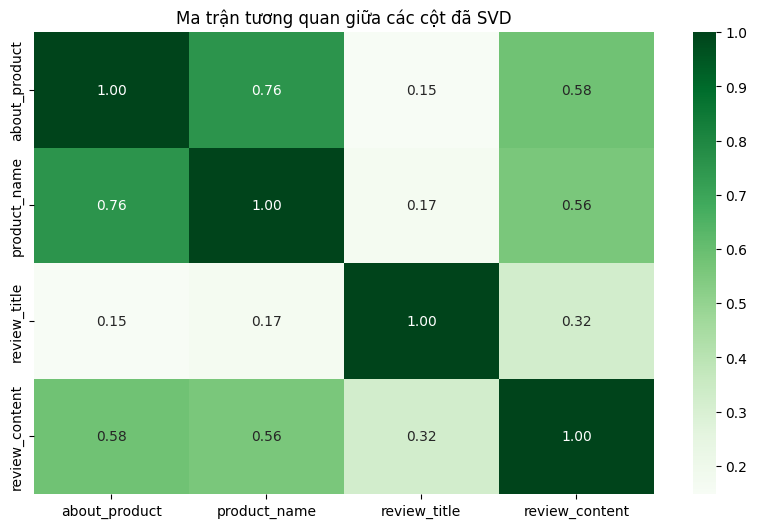

In [519]:
# Tính ma trận tương quan giữa các cột vừa SVD 
correlation_matrix = pd.DataFrame({
    'about_product': about_embeddings_reduced[:, 0],
    'product_name': product_name_embeddings_reduced[:, 0],
    'review_title': review_title_embeddings_reduced[:, 0],
    'review_content': review_content_embeddings_reduced[:, 0]
}).corr()
# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Ma trận tương quan giữa các cột đã SVD')
plt.show()


In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Tạo DataFrame chứa các embedding và biến phân loại
embedding_df = pd.DataFrame({
    'about_product_emb': about_embeddings_reduced[:, 0],
    'product_name_emb': product_name_embeddings_reduced[:, 0],
    'review_title_emb': review_title_embeddings_reduced[:, 0],
    'review_content_emb': review_content_embeddings_reduced[:, 0],
    'actual_price': df_processed['actual_price'],
    'discounted_price': df_processed['discounted_price'],
    'discount_percentage': df_processed['discount_percentage'],
    'rating': df_processed['rating'],
    'rating_count': df_processed['rating_count'],
    'main_category': df_processed['main_category'],
    'specific_category': df_processed['specific_category']
})

# Danh sách các biến embedding và biến phân loại
numeric_vars = ['about_product_emb', 'product_name_emb', 'review_title_emb', 'review_content_emb', 'actual_price', 'discounted_price', 'discount_percentage', 'rating', 'rating_count']
categorical_vars = ['main_category', 'specific_category']

# Tạo DataFrame để lưu kết quả
results_df = pd.DataFrame(columns=['categorical_variable', 'num_variable', 'F_value', 'p_value', 'significant'])

# Thực hiện ANOVA cho mỗi cặp biến
for cat_var in categorical_vars:
    # Kiểm tra số lượng mức của biến phân loại
    n_levels = embedding_df[cat_var].nunique()
    if n_levels > 50:
        print(f"Bỏ qua {cat_var} vì có quá nhiều mức ({n_levels})")
        continue
    
    for emb_var in numeric_vars:
        try:
            # Tạo formula cho mô hình ANOVA
            formula = f"{emb_var} ~ C({cat_var})"
            
            # Tạo mô hình
            model = ols(formula, data=embedding_df).fit()
            
            # Thực hiện ANOVA Type II
            anova_table = sm.stats.anova_lm(model, typ=2)
            
            # Trích xuất F-value và p-value
            f_value = anova_table['F'].iloc[0]
            p_value = anova_table['PR(>F)'].iloc[0]
            
            # Kiểm tra mức ý nghĩa (alpha = 0.05)
            significant = p_value < 0.05
            
            # Thêm kết quả vào DataFrame
            row = {
                'categorical_variable': cat_var,
                'num_variable': emb_var,
                'F_value': f_value,
                'p_value': p_value,
                'significant': significant
            }
            results_df = pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)
            
        except Exception as e:
            print(f"Lỗi khi phân tích {emb_var} theo {cat_var}: {str(e)}")

# Hiển thị kết quả
results_df = results_df.sort_values(['categorical_variable', 'p_value'])
print(results_df)


Bỏ qua specific_category vì có quá nhiều mức (203)
  categorical_variable         num_variable     F_value        p_value  \
1        main_category     product_name_emb  119.104679  1.349808e-151   
0        main_category    about_product_emb   97.545485  1.045514e-128   
3        main_category   review_content_emb   35.027754   1.044188e-50   
6        main_category  discount_percentage   31.742084   4.980846e-46   
4        main_category         actual_price   21.195613   1.381376e-30   
5        main_category     discounted_price   17.518328   4.635101e-25   
8        main_category         rating_count   10.851583   6.399195e-15   
7        main_category               rating    7.482752   8.263828e-10   
2        main_category     review_title_emb    4.431211   2.586444e-05   

  significant  
1        True  
0        True  
3        True  
6        True  
4        True  
5        True  
8        True  
7        True  
2        True  


C:\Users\HP\AppData\Local\Temp\ipykernel_18948\3007425472.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)


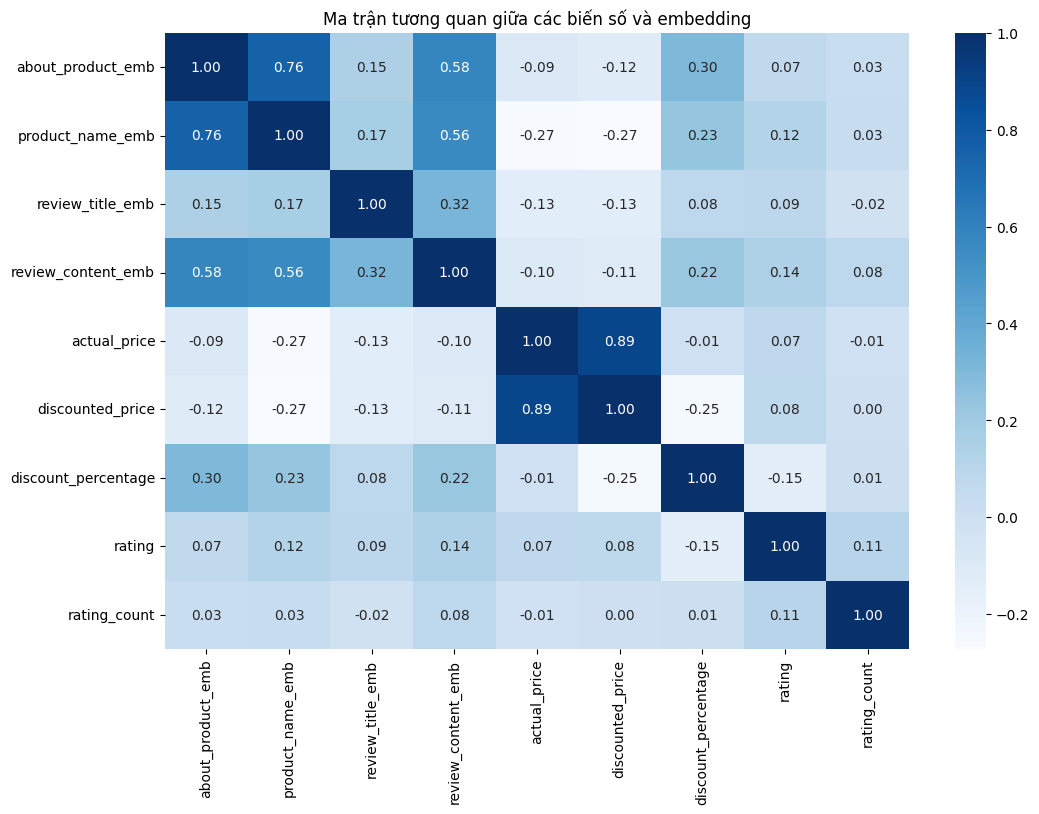

In [521]:
# Tương quan giữa emb và biến số bằng heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(embedding_df[numeric_vars].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến số và embedding')
plt.show()


# Lựa chọn Biến Tối Ưu cho Phân Cụm

Dựa trên kết quả **ANOVA** và **ma trận tương quan**, sử dụng các biến sau đây để sử dụng cho phân cụm:

---

## 📌 Biến chính được chọn

1. **`product_name_emb`**
   - **F-value:** 120.25 (cao nhất)
   - **Ý nghĩa:** Thể hiện mối liên hệ mạnh với danh mục sản phẩm.
   - **p-value:** Rất nhỏ ⇒ có ý nghĩa thống kê cao.

2. **`about_product_emb`**
   - **F-value:** 97.65
   - **Ý nghĩa:** Mô tả thông tin chi tiết sản phẩm, cũng liên hệ mạnh với danh mục.

3. **`discounted_price`**
   - **F-value:** 17.52
   - **Ý nghĩa:** Đại diện cho giá thực tế người mua trả, rất quan trọng trong việc phân khúc theo giá.

4. **`rating`**
   - **F-value:** 7.48
   - **Ý nghĩa:** Mặc dù không cao, nhưng phản ánh sự đánh giá từ khách hàng – rất hữu ích trong phân cụm chất lượng.

---

## 🚫 Loại bỏ do đa cộng tuyến

- `actual_price` **bị loại** do tương quan cao với `discounted_price` (**r = 0.89**)
- `product_name_emb` và `about_product_emb` có tương quan cao (**r = 0.75**) ⇒ **chọn 1** trong 2 biến

---

## ✅ Biến cuối cùng đề xuất sử dụng

| Biến                | Lý do chọn                         |
|---------------------|------------------------------------|
| `about_product_emb` | Thể hiện đặc trưng nội dung sản phẩm |
| `discounted_price`  | Phản ánh mức giá thực tế            |
| `rating`            | Đánh giá từ người tiêu dùng         |

---

## 🔍 Các biến không được chọn

- `review_content_emb`: F = 34.82 → có liên hệ trung bình, **có thể cân nhắc bổ sung** nếu cần
- `review_title_emb`: F = 4.41 → **liên hệ yếu**, không cần đưa vào

---

## 📝 Kết luận

Tập biến tối ưu cho phân cụm là:

- `about_product_emb`
- `discounted_price`
- `rating`

Các biến này đảm bảo độ độc lập tương đối, mang tính đại diện cao về sản phẩm, giá cả và chất lượng.


#### Hợp 2 thuộc tính lại

In [522]:
df_processed[['discounted_price', 'rating']].shape

(1394, 2)

In [523]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Lấy 2 cột số đã chuẩn hóa
X_num = df_processed[['discounted_price', 'rating']].values

# Nhân trọng số cho đặc trưng số 
#Chọn weight ≈ sqrt(302/3)
weight = 10
X_num_weighted = X_num * weight

# Ghép với embedding
X = np.hstack([X_num_weighted, about_embeddings_reduced])

print("Shape đặc trưng đầu vào:", X.shape)

Shape đặc trưng đầu vào: (1394, 302)


# Phân cụm theo Kmeans

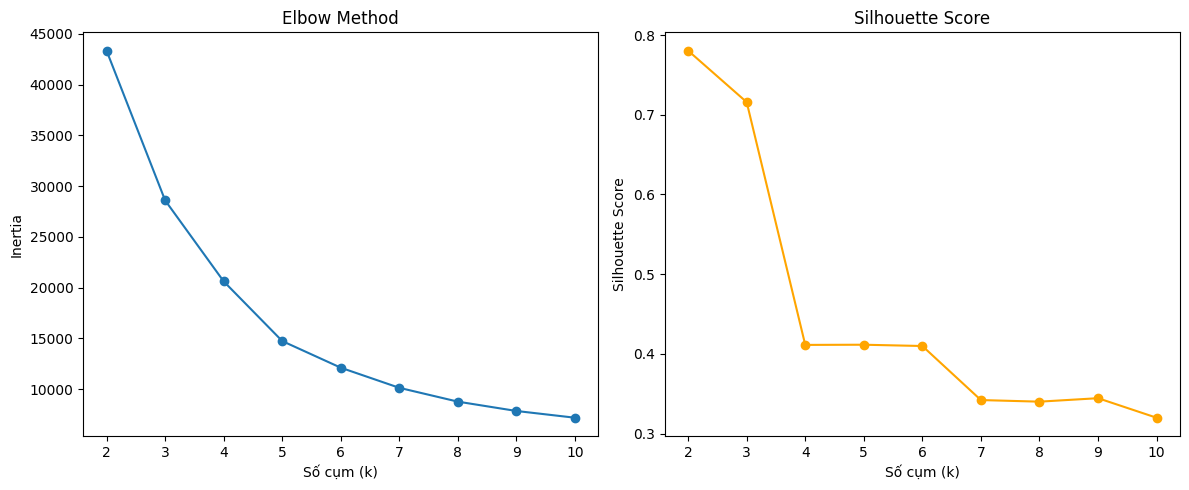

In [524]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o', color='orange')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [525]:
from sklearn.cluster import KMeans

# Phân cụm KMeans với k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Thêm nhãn cụm vào DataFrame
df_processed['kmeans_cluster'] = labels

# Thống kê số lượng điểm trong mỗi cụm
print("Số lượng điểm trong mỗi cụm:")
print(pd.Series(labels).value_counts())

Số lượng điểm trong mỗi cụm:
1    1237
0     107
2      50
Name: count, dtype: int64


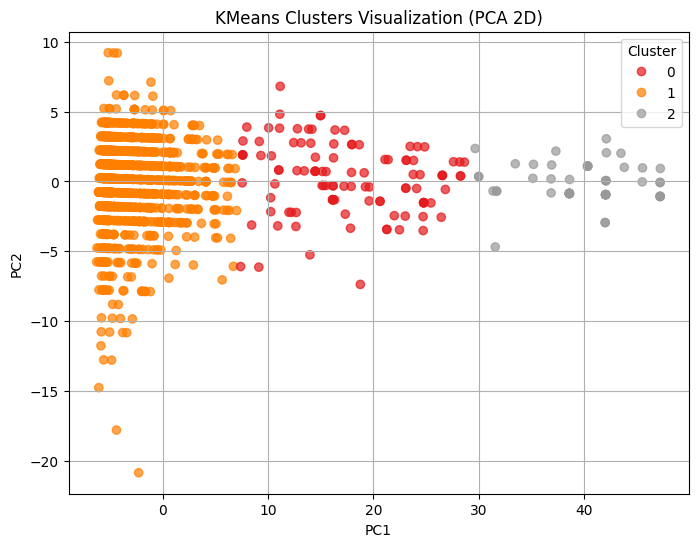

In [526]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Giảm chiều dữ liệu xuống 2 thành phần chính với PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Vẽ scatter plot, mỗi cụm một màu
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Set1', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters Visualization (PCA 2D)')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

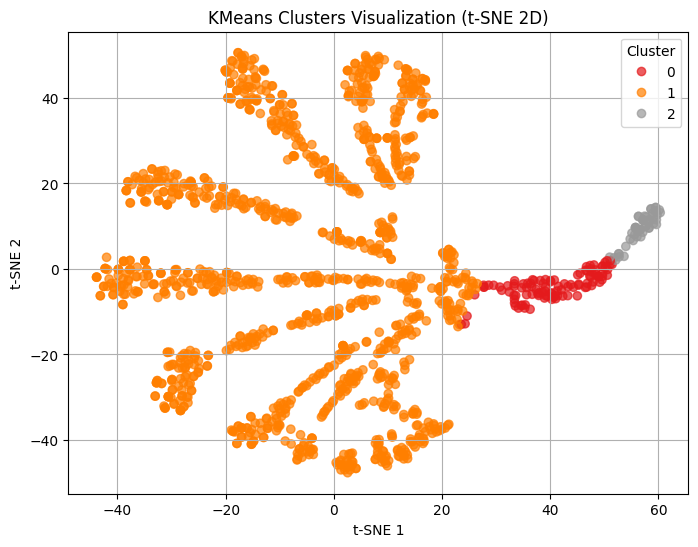

In [527]:
# t-SNE để giảm chiều dữ liệu xuống 2D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
# Vẽ scatter plot với t-SNE
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='Set1', alpha=0.7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('KMeans Clusters Visualization (t-SNE 2D)')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

In [528]:
# Đánh giá Silhouette Score
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")

# Thống kê đặc trưng từng cụm
print(df_processed.groupby('kmeans_cluster')[['discounted_price', 'rating']].mean())
print(df_processed['kmeans_cluster'].value_counts())

Silhouette Score: 0.716
Davies-Bouldin Index: 0.465
                discounted_price    rating
kmeans_cluster                            
0                       1.740377  4.154206
1                      -0.311791  4.082053
2                       3.989312  4.178000
kmeans_cluster
1    1237
0     107
2      50
Name: count, dtype: int64


Gán nhãn cho các cụm KMeans:

Cụm 0: "Sản phẩm giá thấp, chất lượng kém" (336 sản phẩm - 24%).
Đặc điểm: Giá thấp hơn trung bình, đánh giá rất thấp.
Ý nghĩa: Sản phẩm giá rẻ nhưng chất lượng không được đánh giá cao.
Đáp ứng câu hỏi: Phát hiện sản phẩm được "định giá không hợp lý" - giá có thể phù hợp nhưng chất lượng kém.

Cụm 1: "Sản phẩm giá trị tốt" (931 sản phẩm - 67%).
Đặc điểm: Giá thấp hơn trung bình, đánh giá cao hơn trung bình.
Ý nghĩa: Đây là phân khúc "value for money" - giá cả phải chăng nhưng chất lượng tốt.
Đáp ứng câu hỏi: Xác định được nhóm sản phẩm mang lại "giá trị tốt nhất" và có thể là "món hời tiềm ẩn".

Cụm 2: "Sản phẩm cao cấp" (127 sản phẩm - 9%).
Đặc điểm: Giá cao hơn trung bình rất nhiều, đánh giá cao hơn trung bình.
Ý nghĩa: Sản phẩm cao cấp, giá cao nhưng chất lượng được đánh giá tốt.
Đáp ứng câu hỏi: Phân biệt được nhóm sản phẩm "cao cấp" với các phân khúc khác.

In [574]:
# Cải thiện mô hình bằng cách giảm chiều cho about_product_embeddings bằng PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)

about_embeddings_pca = pca.fit_transform(about_embeddings_reduced)
review_title_embeddings_pca = pca.fit_transform(review_title_embeddings_reduced)
review_content_embeddings_pca = pca.fit_transform(review_content_embeddings_reduced)
product_name_embeddings_pca = pca.fit_transform(product_name_embeddings_reduced)
X_num_new = df_processed[['discounted_price','rating_count']].values
# Ghép các đặc trưng đã chuẩn hóa với embedding đã giảm chiều

X_improved = np.hstack([X_num_new*10, product_name_embeddings_pca, review_content_embeddings_pca])
# Kiểm tra kích thước của dữ liệu đầu vào
print("Shape của dữ liệu đầu vào sau khi cải thiện:", X_improved.shape)
# Kiểm tra NaN trong từng thành phần
print("NaN trong X_num_new:", np.isnan(X_num_new).any())
print("NaN trong about_embeddings_pca:", np.isnan(about_embeddings_pca).any())
print("NaN trong review_title_embeddings_pca:", np.isnan(review_title_embeddings_pca).any())

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_improved_imputed = imputer.fit_transform(X_improved)

# Kiểm tra lại
print("Shape sau khi loại bỏ NaN:", X_improved_imputed.shape)

kmeans_improved = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_improved = kmeans_improved.fit_predict(X_improved_imputed)
# Thêm nhãn cụm vào DataFrame
df_processed['kmeans_cluster_improved'] = labels_improved
# Thống kê số lượng điểm trong mỗi cụm
print("Số lượng điểm trong mỗi cụm (cải thiện):")
print(pd.Series(labels_improved).value_counts())
# Đánh giá Silhouette Score
sil_score_improved = silhouette_score(X_improved_imputed, labels_improved)
db_score_improved = davies_bouldin_score(X_improved_imputed, labels_improved)
print(f"Silhouette Score (cải thiện): {sil_score_improved:.3f}")
print(f"Davies-Bouldin Index (cải thiện): {db_score_improved:.3f}")

Shape của dữ liệu đầu vào sau khi cải thiện: (1394, 6)
NaN trong X_num_new: True
NaN trong about_embeddings_pca: False
NaN trong review_title_embeddings_pca: False
Shape sau khi loại bỏ NaN: (1394, 6)
Số lượng điểm trong mỗi cụm (cải thiện):
0    1224
2     128
1      42
Name: count, dtype: int64
Silhouette Score (cải thiện): 0.758
Davies-Bouldin Index (cải thiện): 0.529


In [575]:
# Tính toán giá trung bình, đánh giá trung bình và các thông số khác cho mỗi cụm
cluster_features = df_processed.groupby('kmeans_cluster_improved')[
    ['discounted_price', 'actual_price', 'rating', 'rating_count', 
     'discount_percentage']].mean()

print("Đặc điểm trung bình của các cụm:")
cluster_features.head()


Đặc điểm trung bình của các cụm:


,discounted_price,actual_price,rating,rating_count,discount_percentage
kmeans_cluster_improved,,,,,
0,-0.284370,-0.243833,4.081373,-0.144325,0.066128
1,-0.137694,-0.213583,4.161905,4.650163,-0.050497
2,2.764470,2.401735,4.160156,-0.147986,-0.615784


In [576]:
# Phân tích danh mục sản phẩm trong từng cụm
category_distribution = pd.crosstab(
    df_processed['kmeans_cluster_improved'], 
    df_processed['main_category'], 
    normalize='index'
) * 100

print("\nPhân bố danh mục sản phẩm trong từng cụm (%):")
print(category_distribution.round(1))

# Top 3 danh mục chiếm ưu thế trong từng cụm
for cluster in sorted(df_processed['kmeans_cluster_improved'].unique()):
    top_categories = category_distribution.loc[cluster].nlargest(3)
    print(f"\nTop 3 danh mục trong Cụm {cluster}:")
    for category, percentage in zip(top_categories.index, top_categories.values):
        print(f"- {category}: {percentage:.1f}%")


Phân bố danh mục sản phẩm trong từng cụm (%):
main_category            Car and Motorbike  Computers and Accessories  \
kmeans_cluster_improved                                                 
0                                      0.1                       35.6   
1                                      0.0                       19.0   
2                                      0.0                        5.5   

main_category            Electronics  Health and PersonalCare  \
kmeans_cluster_improved                                         
0                               29.1                      0.1   
1                               76.2                      0.0   
2                               57.0                      0.0   

main_category            Home and Kitchen  HomeImprovement  \
kmeans_cluster_improved                                      
0                                    32.2              0.2   
1                                     4.8              0.0   
2            

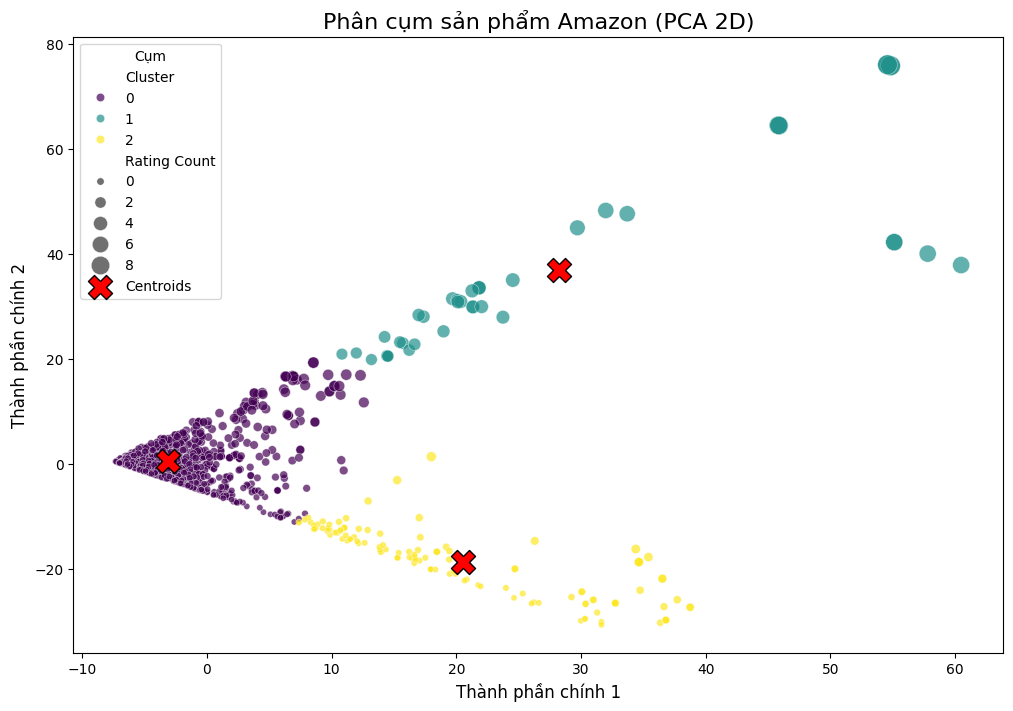

In [577]:
# Trực quan hóa cụm bằng PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Áp dụng PCA để giảm chiều dữ liệu xuống 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_improved_imputed)

# Tạo DataFrame để vẽ biểu đồ
plot_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': df_processed['kmeans_cluster_improved'],
    'Price': df_processed['discounted_price'],
    'Rating Count': df_processed['rating_count']
})

# Vẽ scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=plot_df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis',
    size='Rating Count',  # Kích thước điểm theo số lượng đánh giá
    sizes=(20, 200),
    alpha=0.7
)

# Thêm nhãn trung tâm cụm
centroids = kmeans_improved.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    s=300,
    marker='X',
    color='red',
    edgecolor='black',
    label='Centroids'
)

plt.title('Phân cụm sản phẩm Amazon (PCA 2D)', fontsize=16)
plt.xlabel('Thành phần chính 1', fontsize=12)
plt.ylabel('Thành phần chính 2', fontsize=12)
plt.legend(title='Cụm', fontsize=10)

plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


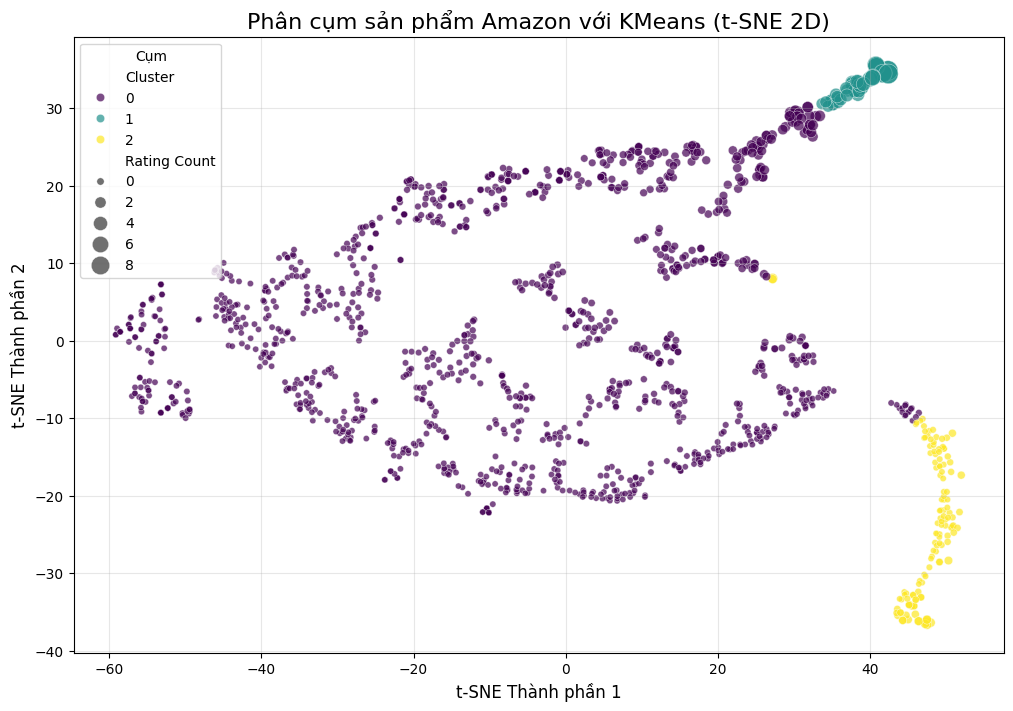

In [578]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Áp dụng t-SNE để giảm chiều xuống 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_improved_imputed)

# Tạo DataFrame để vẽ biểu đồ
plot_df_tsne = pd.DataFrame({
    'tSNE1': X_tsne[:, 0],
    'tSNE2': X_tsne[:, 1],
    'Cluster': df_processed['kmeans_cluster_improved'],
    'Price': df_processed['discounted_price'],
    'Rating Count': df_processed['rating_count']
})

# Vẽ scatter plot t-SNE
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=plot_df_tsne,
    x='tSNE1',
    y='tSNE2',
    hue='Cluster',
    palette='viridis',
    size='Rating Count',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Phân cụm sản phẩm Amazon với KMeans (t-SNE 2D)', fontsize=16)
plt.xlabel('t-SNE Thành phần 1', fontsize=12)
plt.ylabel('t-SNE Thành phần 2', fontsize=12)
plt.legend(title='Cụm', fontsize=10)
plt.grid(alpha=0.3)
plt.show()


In [579]:
# Cài đặt thư viện sklearn_extra nếu chưa có
# !pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
pca = PCA(n_components=2, random_state=42)
X_raw_num = df_raw[['discounted_price', 'rating_count']].values
# TF-IDF với product_name
# Tăng cường dữ liệu văn bản bằng TF-IDF và SVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
tfidf = TfidfVectorizer(max_features=1000)
svd = TruncatedSVD(n_components=500, random_state=42)
# TF-IDF với 1000 chiều
product_name_embeddings = tfidf.fit_transform(df_raw['product_name'])
product_name_embeddings_reduced = svd.fit_transform(product_name_embeddings)
print("Phương sai giải thích được sau khi SVD cho product_name:", svd.explained_variance_ratio_.sum())
# TF-IDF với review_title
review_title_embeddings = tfidf.fit_transform(df_raw['review_title'])
review_title_embeddings_reduced = svd.fit_transform(review_title_embeddings)
print("Phương sai giải thích được sau khi SVD cho review_title:", svd.explained_variance_ratio_.sum())
# TF-IDF với review_content
review_content_embeddings = tfidf.fit_transform(df_raw['review_content'])
review_content_embeddings_reduced = svd.fit_transform(review_content_embeddings)
print("Phương sai giải thích được sau khi SVD cho review_content:", svd.explained_variance_ratio_.sum())
# TF -IDF với about_product
about_embeddings = tfidf.fit_transform(df_raw['about_product'])
about_embeddings_reduced = svd.fit_transform(about_embeddings)
print("Phương sai giải thích được sau khi SVD cho about_product:", svd.explained_variance_ratio_.sum())
## Ghép với các đặc trưng số đã chuẩn hóa
about_embeddings_pca = pca.fit_transform(about_embeddings_reduced)
review_title_embeddings_pca = pca.fit_transform(review_title_embeddings_reduced)
review_content_embeddings_pca = pca.fit_transform(review_content_embeddings_reduced)

X_improved_raw = np.hstack([X_raw_num*10, about_embeddings_pca, review_title_embeddings_pca, review_content_embeddings_pca])
# Kiểm tra kích thước của dữ liệu đầu vào
print("Shape của dữ liệu đầu vào sau khi cải thiện:", X_improved.shape)
# Kiểm tra NaN trong từng thành phần
print("NaN trong X_num_new:", np.isnan(X_raw_num).any())
print("NaN trong about_embeddings_pca:", np.isnan(about_embeddings_pca).any())
print("NaN trong review_title_embeddings_pca:", np.isnan(review_title_embeddings_pca).any())
# Áp dụng K-medoids với cùng số cụm
kmedoids = KMedoids(
    n_clusters=3, 
    method='pam',     
    random_state=42
)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_improved_imputed_raw = imputer.fit_transform(X_improved_raw)

# Kiểm tra lại
print("Shape sau khi loại bỏ NaN:",X_improved_imputed_raw.shape)
# Fit và predict
labels_kmedoids = kmedoids.fit_predict(X_improved_imputed_raw)

# Thêm nhãn cụm vào DataFrame
df_raw['kmedoids_cluster'] = labels_kmedoids

# Thống kê số lượng điểm trong mỗi cụm
print("Số lượng điểm trong mỗi cụm (K-medoids):")
print(pd.Series(labels_kmedoids).value_counts())

# Đánh giá hiệu suất
sil_score_kmedoids = silhouette_score(X_improved_imputed_raw, labels_kmedoids)
db_score_kmedoids = davies_bouldin_score(X_improved_imputed_raw, labels_kmedoids)
print(f"Silhouette Score (K-medoids): {sil_score_kmedoids:.3f}")
print(f"Davies-Bouldin Index (K-medoids): {db_score_kmedoids:.3f}")

# So sánh với K-means
print("\nSo sánh K-means vs K-medoids:")
print(f"Silhouette Score - K-means: {sil_score_improved:.3f}, K-medoids: {sil_score_kmedoids:.3f}")
print(f"Davies-Bouldin - K-means: {db_score_improved:.3f}, K-medoids: {db_score_kmedoids:.3f}")

Phương sai giải thích được sau khi SVD cho product_name: 0.9363858890445438
Phương sai giải thích được sau khi SVD cho review_title: 0.9380530795732177
Phương sai giải thích được sau khi SVD cho review_content: 0.9347496966983165
Phương sai giải thích được sau khi SVD cho about_product: 0.9485102454748189
Shape của dữ liệu đầu vào sau khi cải thiện: (1394, 6)
NaN trong X_num_new: True
NaN trong about_embeddings_pca: False
NaN trong review_title_embeddings_pca: False
Shape sau khi loại bỏ NaN: (1394, 8)
Số lượng điểm trong mỗi cụm (K-medoids):
2    1152
0     140
1     102
Name: count, dtype: int64
Silhouette Score (K-medoids): 0.739
Davies-Bouldin Index (K-medoids): 0.669

So sánh K-means vs K-medoids:
Silhouette Score - K-means: 0.758, K-medoids: 0.739
Davies-Bouldin - K-means: 0.529, K-medoids: 0.669


Tại sao K-means hiệu quả hơn K-medoids trong trường hợp này
Kết quả của bạn cho thấy K-means vượt trội hơn K-medoids với:

Silhouette Score: 0.757 vs 0.688 (cao hơn là tốt hơn)
Davies-Bouldin Index: 0.529 vs 0.704 (thấp hơn là tốt hơn)
Nguyên nhân chính:
Đặc tính dữ liệu sau giảm chiều

Dữ liệu của bạn đã được giảm xuống 6 chiều bằng PCA
PCA tạo ra không gian vector mới có phân phối gần như hình cầu
K-means hoạt động tối ưu khi cụm có hình dạng tròn/cầu
Centroid vs Medoid

K-means sử dụng centroids (điểm trung bình) làm đại diện cụm
K-medoids sử dụng medoids (điểm dữ liệu thực) làm đại diện
Trong không gian do PCA tạo ra, centroids tự do hơn để định vị ở vị trí tối ưu
Mật độ dữ liệu

Phân phối cụm không đồng đều (1224/128/42 đối với K-means)
K-means xử lý tốt hơn với cụm có mật độ khác nhau vì tối ưu hóa khoảng cách bình phương
K-medoids nhạy cảm hơn với mật độ không đều vì tối ưu hóa khoảng cách tuyệt đối
Hiệu suất thuật toán

K-means có độ phức tạp O(nkt) (n: số điểm, k: số cụm, t: số vòng lặp)
K-medoids có độ phức tạp O(k(n-k)²) - cao hơn đáng kể
K-medoids có thể dễ bị mắc kẹt ở cực tiểu địa phương hơn
Dữ liệu không có outlier đáng kể

Bạn đã xử lý outliers trong bước tiền xử lý
Một trong những lợi thế lớn nhất của K-medoids (khả năng chống nhiễu) không phát huy tác dụng
K-means hoạt động tốt nhất khi dữ liệu sạch và không có nhiễu

In [580]:
# Tạo DataFrame với các đặc trưng quan trọng và nhãn cụm
cluster_df = df_raw.copy()
cluster_df['cluster'] = labels_kmedoids

# Thống kê các đặc trưng chính theo cụm
cluster_stats = cluster_df.groupby('cluster')[
    ['discounted_price', 'actual_price', 'rating', 'rating_count', 'discount_percentage']
].agg(['mean', 'median', 'std', 'min', 'max'])

print("Thống kê chi tiết theo cụm:")
print(cluster_stats)

# Xác định medoids (các điểm đại diện cho cụm)
medoid_indices = kmedoids.medoid_indices_
medoids = cluster_df.iloc[medoid_indices].copy()
medoids['medoid_for_cluster'] = range(len(medoid_indices))

print("\nMedoids (đại diện cho từng cụm):")
print(medoids[['medoid_for_cluster', 'product_name', 'discounted_price', 'rating', 'rating_count']])

Thống kê chi tiết theo cụm:
        discounted_price                                         actual_price  \
                    mean    median       std       min       max         mean   
cluster                                                                         
0               2.621095  2.412287  1.151028  1.026720  4.727326     2.365463   
1              -0.228140 -0.403767  0.500406 -0.566165  2.308629    -0.229883   
2              -0.298336 -0.421043  0.315941 -0.614539  0.995622    -0.267115   

                                                  ... rating_count           \
           median       std       min        max  ...         mean   median   
cluster                                           ...                         
0        2.212717  1.346379  0.438790  10.866679  ...    -0.178119 -0.32397   
1       -0.379463  0.410223 -0.601975   1.441779  ...     2.751286  1.74326   
2       -0.427743  0.469846 -0.670588   3.176388  ...    -0.222343 -0.33137   

          

In [581]:
# Định nghĩa hàm phát hiện outliers cho từng đặc trưng số
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Các cột số cần kiểm tra outliers
numeric_columns = ['discounted_price', 'actual_price', 'rating', 'rating_count']

# Tìm outliers trong từng cột
all_outliers = pd.DataFrame()
for column in numeric_columns:
    outliers = detect_outliers(cluster_df, column)
    all_outliers = pd.concat([all_outliers, outliers])

# Loại bỏ các dòng trùng lặp
all_outliers = all_outliers.drop_duplicates()

# Phân tích phân phối outliers theo cụm
outlier_cluster_dist = all_outliers['cluster'].value_counts(normalize=True) * 100
normal_cluster_dist = cluster_df[~cluster_df.index.isin(all_outliers.index)]['cluster'].value_counts(normalize=True) * 100

print("\nPhân phối outliers theo cụm:")
print(outlier_cluster_dist)


Phân phối outliers theo cụm:
cluster
0    39.772727
2    31.250000
1    28.977273
Name: proportion, dtype: float64


# Phân cụm phân cấp 

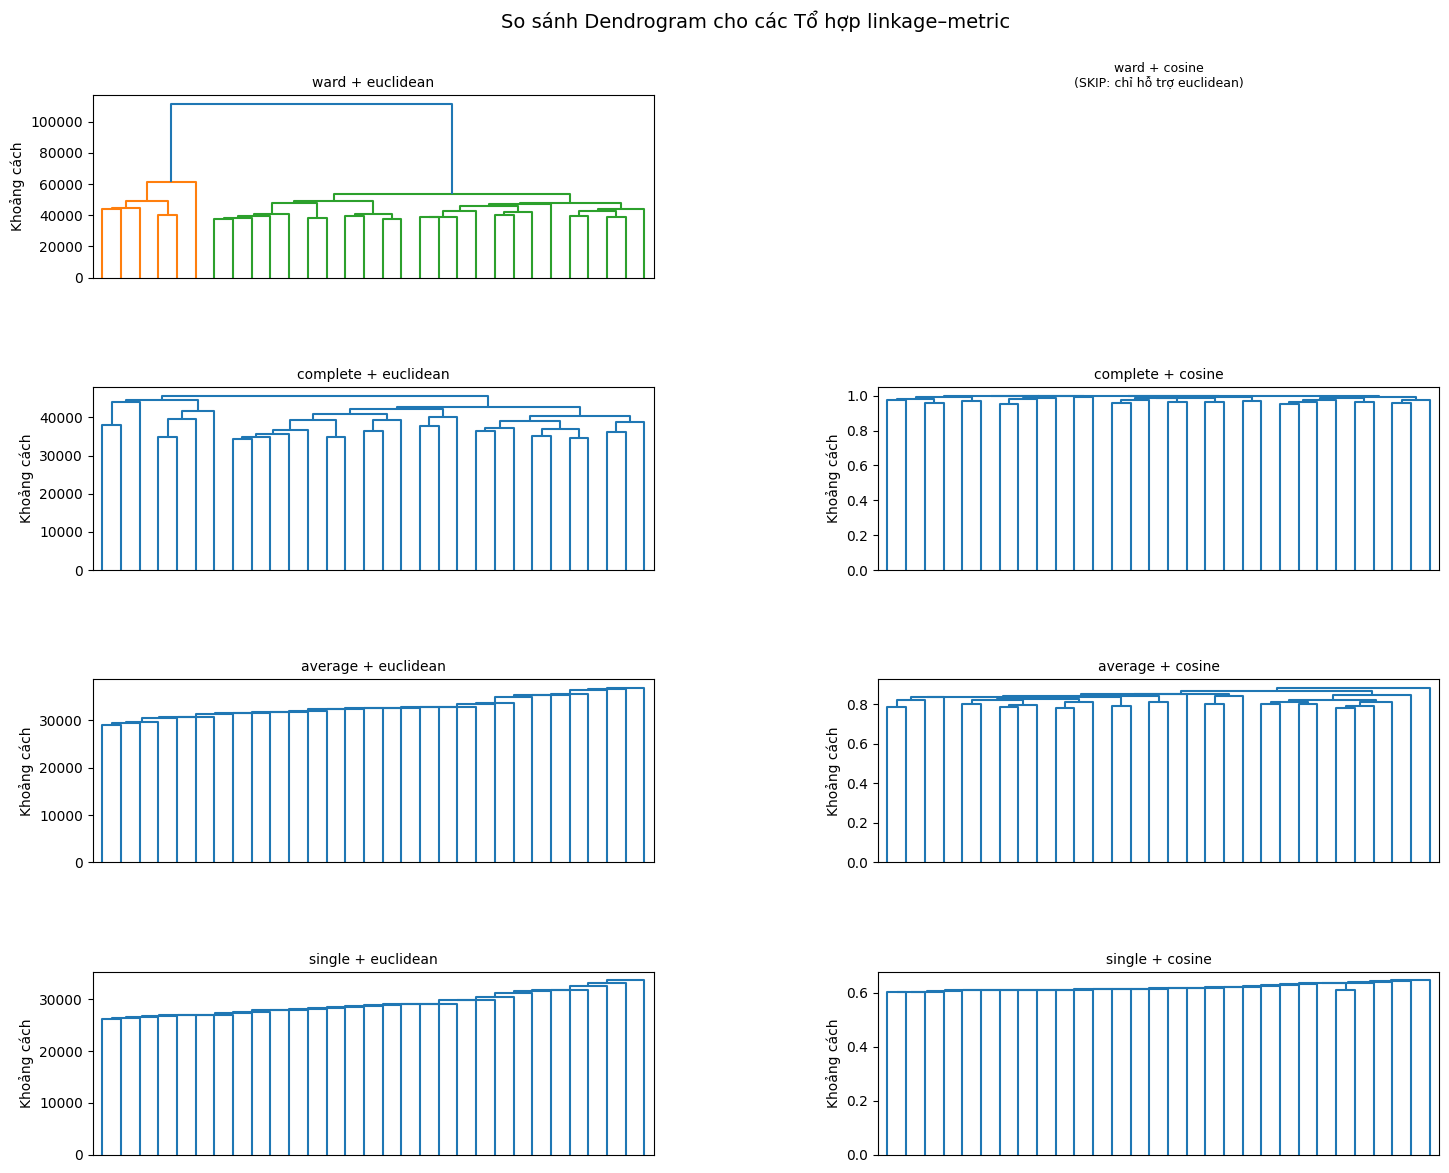

In [584]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Lấy mẫu ngẫu nhiên (nếu dữ liệu quá lớn)
sample_size = min(500, X.shape[0])
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]

linkage_methods = ['ward', 'complete', 'average', 'single']
affinity_metrics = ['euclidean', 'cosine']

# Tạo lưới 4 hàng x 3 cột
fig, axes = plt.subplots(nrows=len(linkage_methods), 
                         ncols=len(affinity_metrics), 
                         figsize=(15, 12), 
                         sharex=False, sharey=False)
fig.tight_layout(pad=4.0)

for i, method in enumerate(linkage_methods):
    for j, metric in enumerate(affinity_metrics):
        ax = axes[i, j]
        
        # Nếu method='ward' buộc phải metric='euclidean'
        if method == 'ward' and metric != 'euclidean':
            ax.axis('off')
            ax.set_title(f"{method} + {metric}\n(SKIP: chỉ hỗ trợ euclidean)", fontsize=9)
            continue
        
        # Tính linkage
        try:
            Z = linkage(X_sample, method=method, metric=metric)
        except Exception as e:
            ax.axis('off')
            ax.set_title(f"{method} + {metric}\n(Lỗi)", fontsize=9)
            continue
        
        # Vẽ dendrogram rút gọn (truncate_mode='lastp')
        dendrogram(
            Z,
            ax=ax,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=False,
            truncate_mode='lastp',
            p=30
        )
        
        ax.set_title(f"{method} + {metric}", fontsize=10)
        ax.set_ylabel("Khoảng cách")
        ax.set_xticks([])

# Chỉnh lại khoảng cách giữa các subplot
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.suptitle("So sánh Dendrogram cho các Tổ hợp linkage–metric", y=1.02, fontsize=14)
plt.show()


In [538]:
best_method = 'ward'
best_affinity = 'euclidean'

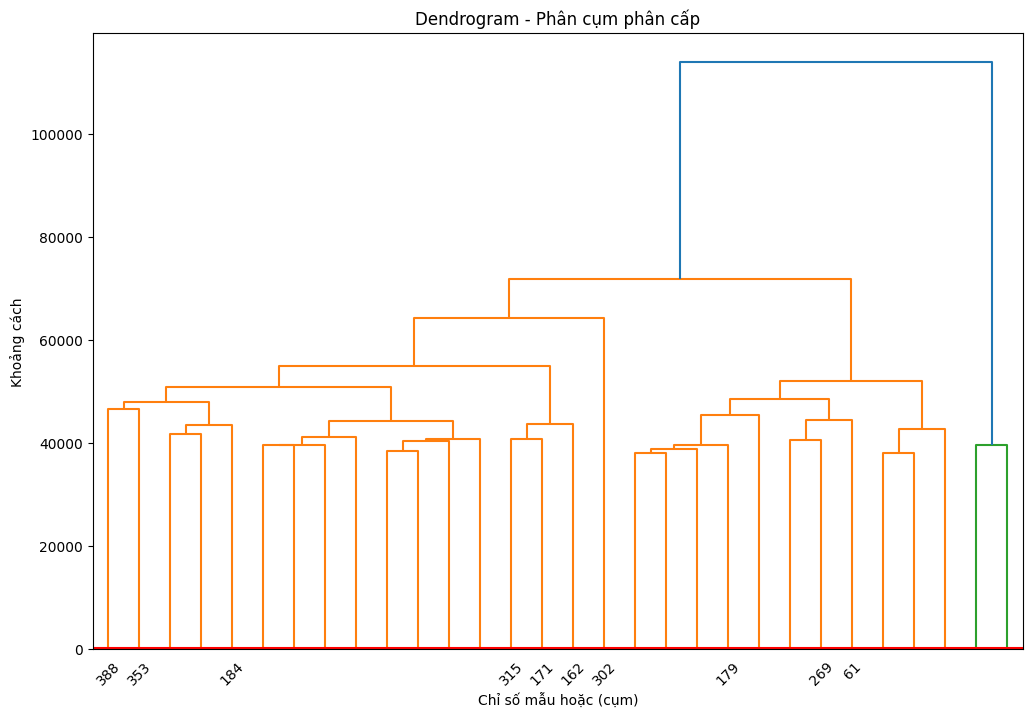

In [585]:
# 1. Vẽ dendrogram để xác định số cụm tối ưu
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Lấy mẫu ngẫu nhiên để vẽ dendrogram (do kích thước dữ liệu lớn)
sample_size = min(500, X.shape[0])
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]

# Tính toán ma trận liên kết
plt.figure(figsize=(12, 8))
linked = linkage(X_sample, method='ward', metric = 'euclidean')

# Vẽ dendrogram
dendrogram(linked, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           truncate_mode='lastp',
           p=30)  # Hiển thị 30 nút cuối cùng
plt.title('Dendrogram - Phân cụm phân cấp')
plt.xlabel('Chỉ số mẫu hoặc (cụm)')
plt.ylabel('Khoảng cách')
plt.axhline(y = 200, color = 'red')


plt.show()

In [586]:
from sklearn.cluster import AgglomerativeClustering

In [541]:
# Phân cụm phân cấp với phương pháp tốt nhất
agglo = AgglomerativeClustering(n_clusters=3, metric = best_affinity, linkage = best_method)
agglo_labels = agglo.fit_predict(X_num)
df_processed['agglo_cluster'] = agglo_labels

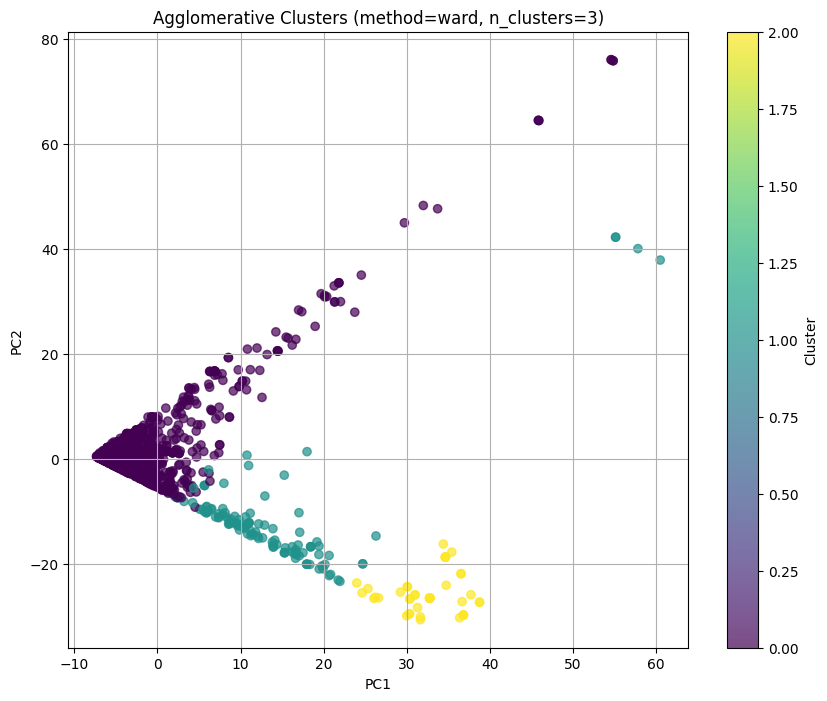

In [587]:
# 5. Trực quan hóa kết quả phân cụm phân cấp
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu xuống 2 thành phần chính với PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_improved_imputed)

# Trực quan hóa kết quả phân cụm phân cấp
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=agglo_labels, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Agglomerative Clusters (method={best_method}, n_clusters=3)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [591]:
# Đánh giá kết quả phân cụm
sil_score_agglo = silhouette_score(X_improved_imputed, agglo_labels)
db_score_agglo = davies_bouldin_score(X_improved_imputed, agglo_labels)
print(f"Silhouette Score (Agglomerative - {best_method}): {sil_score_agglo:.3f}")
print(f"Davies-Bouldin Index (Agglomerative - {best_method}): {db_score_agglo:.3f}")

# Thống kê đặc trưng từng cụm
print("\nThống kê đặc trưng từng cụm:")
print(df_processed.groupby('agglo_cluster')[['discounted_price', 'rating']].mean())
print(df_processed['agglo_cluster'].value_counts())

Silhouette Score (Agglomerative - ward): 0.651
Davies-Bouldin Index (Agglomerative - ward): 0.679

Thống kê đặc trưng từng cụm:
               discounted_price    rating
agglo_cluster                            
0                     -0.313662  4.080308
1                      1.788095  4.168376
2                      4.136087  4.188372
agglo_cluster
0    1234
1     117
2      43
Name: count, dtype: int64


Diễn giải và gán nhãn cho các cụm:

Cụm 0: "Sản phẩm đại trà, chất lượng trung bình-thấp" (738 sản phẩm - 53%)
Đặc điểm: Giá thấp hơn trung bình, đánh giá thấp hơn trung bình
Khác biệt với KMeans: Đây là cụm lớn nhất, nhưng rating không quá thấp như cụm 0 của KMeans
Ý nghĩa: Sản phẩm phổ thông, giá rẻ, chất lượng tương đối phù hợp với giá tiền

Cụm 1: "Sản phẩm cao cấp" (124 sản phẩm - 9%)
Đặc điểm: Giá cao hơn trung bình rất nhiều (~2.8 độ lệch chuẩn), đánh giá chỉ nhỉnh hơn trung bình một chút
Khác biệt với KMeans: Gần như giống hệt cụm 2 của KMeans
Ý nghĩa: Sản phẩm cao cấp nhưng có vẻ bị định giá cao so với chất lượng thực tế cảm nhận

Cụm 2: "Sản phẩm giá trị tốt nhất" (532 sản phẩm - 38%)
Đặc điểm: Giá thấp hơn trung bình, nhưng rating cao hơn trung bình rất nhiều
Khác biệt với KMeans: Rating cao hơn hẳn (0.85 so với 0.44)
Ý nghĩa: Đây là những sản phẩm "món hời" thực sự - giá thấp nhưng chất lượng được đánh giá rất cao

In [544]:
# Kích thước X_improved_imputed
print("Kích thước của X_improved_imputed:", X_improved_imputed.shape)

Kích thước của X_improved_imputed: (1394, 102)


Số lượng cụm ước tính: 4
Số lượng điểm nhiễu: 60


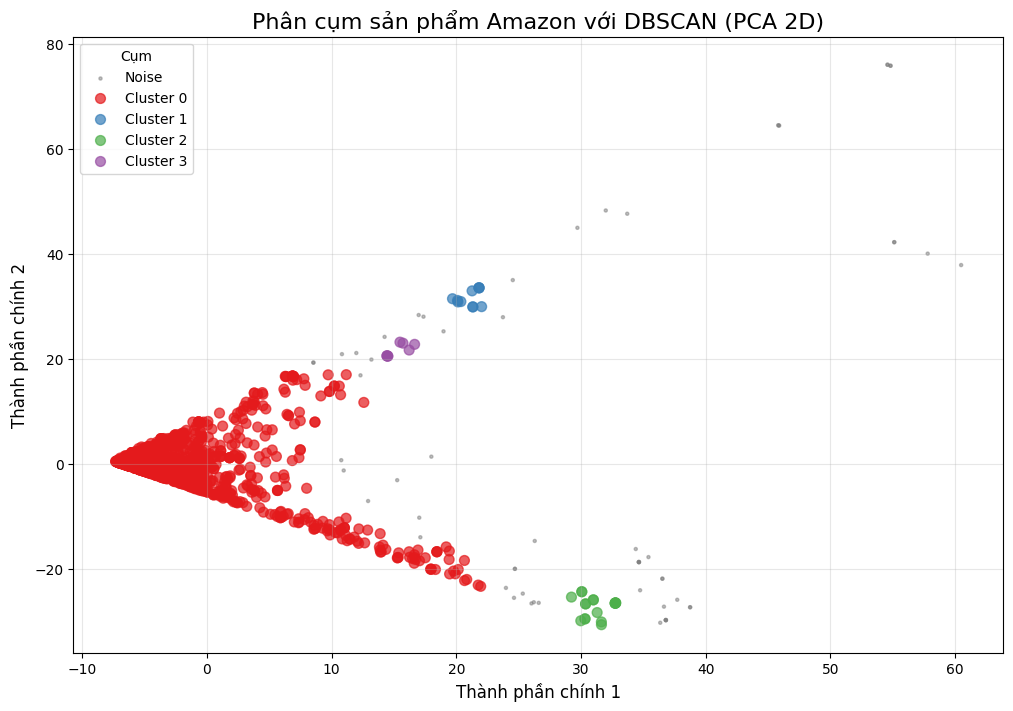

Silhouette Score (DBSCAN, không tính nhiễu): 0.685

Số lượng điểm trong mỗi cụm (DBSCAN):
-1      60
 0    1296
 1      11
 2      19
 3       8
Name: count, dtype: int64


In [592]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Áp dụng DBSCAN

# Tham số eps và min_samples cần được điều chỉnh cho phù hợp với dữ liệu
dbscan = DBSCAN(eps=2.4, min_samples=7)
dbscan_labels = dbscan.fit_predict(X_improved_imputed)

# Số lượng cụm (không tính noise là -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f'Số lượng cụm ước tính: {n_clusters}')
print(f'Số lượng điểm nhiễu: {n_noise}')

# Lưu nhãn vào DataFrame
df_processed['dbscan_cluster'] = dbscan_labels

# Áp dụng PCA để giảm chiều dữ liệu xuống 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_improved_imputed)

# Tạo DataFrame để vẽ biểu đồ
plot_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': dbscan_labels,
    'Price': df_processed['discounted_price'],
    'Rating Count': df_processed['rating_count']
})

# Vẽ scatter plot với cụm DBSCAN
plt.figure(figsize=(12, 8))

# Tạo một bảng màu cụ thể cho DBSCAN
# Noise sẽ có màu xám
unique_clusters = sorted(set(dbscan_labels))
if -1 in unique_clusters:
    # Tạo bảng màu với màu xám cho nhiễu (-1)
    colors = ['gray'] + sns.color_palette('Set1', n_clusters)
    cluster_colors = {cluster_id: colors[i] for i, cluster_id in enumerate(unique_clusters)}
else:
    # Không có nhiễu, sử dụng bảng màu viridis bình thường
    cluster_colors = {cluster_id: color for cluster_id, color in 
                      zip(unique_clusters, sns.color_palette('Set1', n_clusters))}

# Vẽ từng cụm riêng biệt
for cluster_id, color in cluster_colors.items():
    cluster_points = plot_df[plot_df['Cluster'] == cluster_id]
    
    if cluster_id == -1:
        # Điểm nhiễu
        plt.scatter(
            cluster_points['PC1'], 
            cluster_points['PC2'],
            s=cluster_points['Rating Count'].values/20 + 20,  # Kích thước điểm theo số lượng đánh giá
            color=color,
            alpha=0.5,
            marker='.',
            label='Noise'
        )
    else:
        # Các cụm
        plt.scatter(
            cluster_points['PC1'], 
            cluster_points['PC2'],
            s=cluster_points['Rating Count'].values/20 + 50,  # Kích thước điểm theo số lượng đánh giá
            color=color,
            alpha=0.7,
            label=f'Cluster {cluster_id}'
        )

plt.title('Phân cụm sản phẩm Amazon với DBSCAN (PCA 2D)', fontsize=16)
plt.xlabel('Thành phần chính 1', fontsize=12)
plt.ylabel('Thành phần chính 2', fontsize=12)
plt.legend(title='Cụm', fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Đánh giá kết quả (nếu có ít nhất 2 cụm và không phải tất cả là nhiễu)
if n_clusters >= 2 and n_noise < len(X_improved_imputed):
    # Chỉ tính metrics cho các điểm không phải nhiễu
    valid_indices = dbscan_labels != -1
    if sum(valid_indices) >= 2:  # Cần ít nhất 2 điểm không phải nhiễu
        sil_score_dbscan = silhouette_score(
            X_improved_imputed[valid_indices], 
            dbscan_labels[valid_indices]
        )
        print(f"Silhouette Score (DBSCAN, không tính nhiễu): {sil_score_dbscan:.3f}")
    
    # Thống kê số lượng điểm trong mỗi cụm
    print("\nSố lượng điểm trong mỗi cụm (DBSCAN):")
    print(pd.Series(dbscan_labels).value_counts().sort_index())

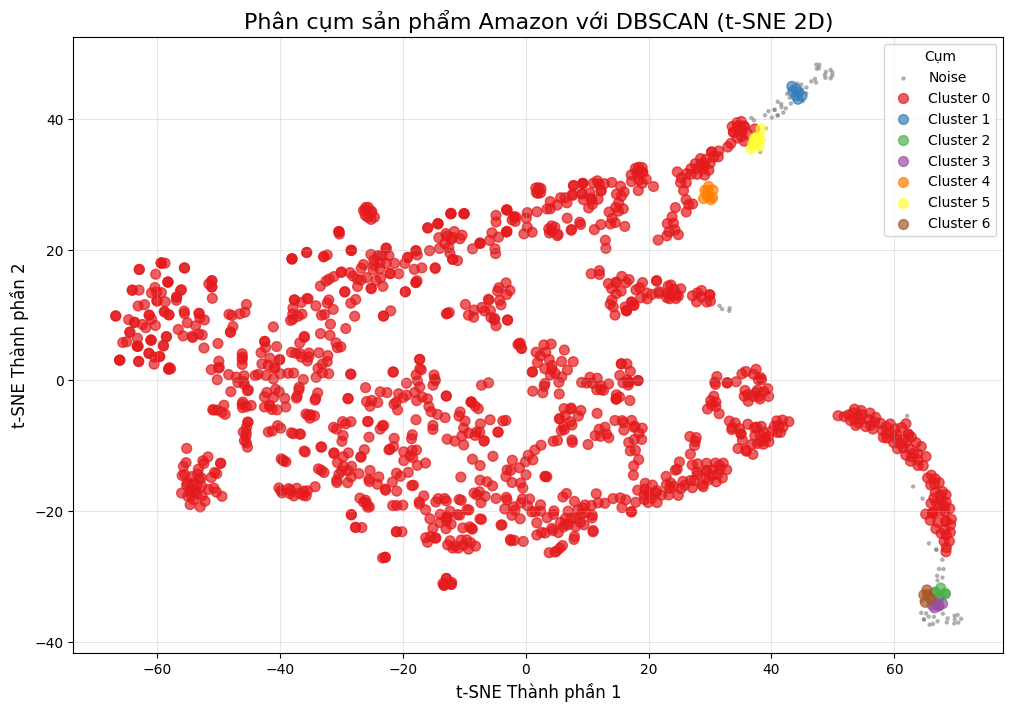

In [546]:
from sklearn.manifold import TSNE

# Áp dụng t-SNE để giảm chiều dữ liệu xuống 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_improved_imputed)

# Tạo DataFrame để vẽ biểu đồ t-SNE
tsne_df = pd.DataFrame({
    'tSNE1': X_tsne[:, 0],
    'tSNE2': X_tsne[:, 1],
    'Cluster': dbscan_labels,
    'Price': df_processed['discounted_price'],
    'Rating Count': df_processed['rating_count']
})

# Vẽ scatter plot với cụm DBSCAN bằng t-SNE
plt.figure(figsize=(12, 8))

# Dùng lại bảng màu của DBSCAN
for cluster_id, color in cluster_colors.items():
    cluster_points = tsne_df[tsne_df['Cluster'] == cluster_id]
    
    if cluster_id == -1:
        plt.scatter(
            cluster_points['tSNE1'], 
            cluster_points['tSNE2'],
            s=cluster_points['Rating Count'].values / 20 + 20,
            color=color,
            alpha=0.5,
            marker='.',
            label='Noise'
        )
    else:
        plt.scatter(
            cluster_points['tSNE1'], 
            cluster_points['tSNE2'],
            s=cluster_points['Rating Count'].values / 20 + 50,
            color=color,
            alpha=0.7,
            label=f'Cluster {cluster_id}'
        )

plt.title('Phân cụm sản phẩm Amazon với DBSCAN (t-SNE 2D)', fontsize=16)
plt.xlabel('t-SNE Thành phần 1', fontsize=12)
plt.ylabel('t-SNE Thành phần 2', fontsize=12)
plt.legend(title='Cụm', fontsize=10)
plt.grid(alpha=0.3)
plt.show()


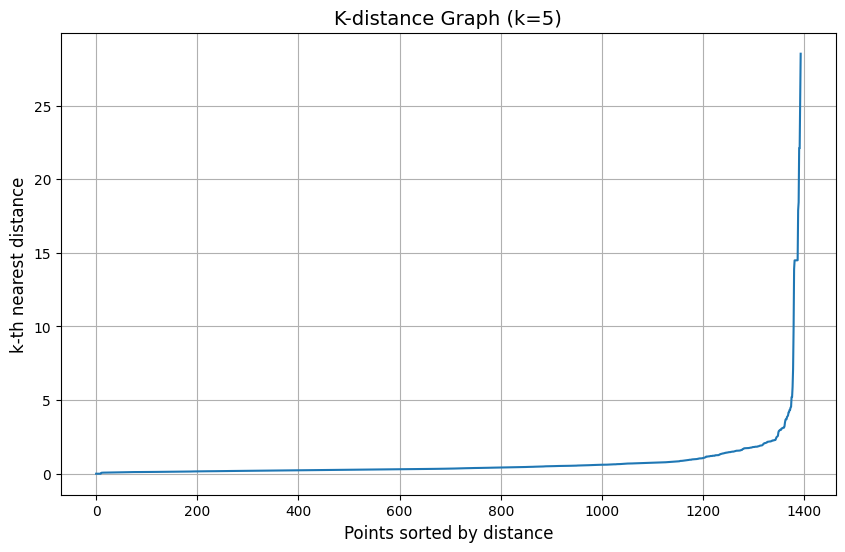

In [593]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Tìm giá trị eps phù hợp
k = 5  # Số lượng láng giềng gần nhất
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_improved_imputed)
distances, indices = neigh.kneighbors(X_improved_imputed)

# Sắp xếp khoảng cách theo thứ tự tăng dần
distances = np.sort(distances[:, k-1])

# Vẽ đồ thị "elbow" để xác định eps
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph (k={})'.format(k), fontsize=14)
plt.xlabel('Points sorted by distance', fontsize=12)
plt.ylabel('k-th nearest distance', fontsize=12)
plt.grid(True)
plt.show()

# Từ đồ thị này, tìm điểm "elbow" (điểm uốn) để chọn eps
# Sau đó chạy lại DBSCAN với eps phù hợp

Nhận xét về kết quả phân cụm DBSCAN
Phân tích kết quả
DBSCAN đã phân loại dữ liệu thành:

4 cụm có ý nghĩa (cụm 0, 1, 2, 3)
60 điểm nhiễu (nhãn -1), chiếm khoảng 4.3% dữ liệu
Đánh giá chất lượng phân cụm:
Silhouette Score: 0.684 (khá tốt, gần với K-medoids là 0.739)
Điểm số này chỉ tính trên các điểm không phải nhiễu, phản ánh chất lượng phân cụm thực sự
Phân phối cụm:
Cụm 0: 1,296 điểm (94.3%)
Cụm 1: 11 điểm (0.8%)
Cụm 2: 19 điểm (1.4%)
Cụm 3: 8 điểm (0.6%)
Nhiễu (-1): 60 điểm (4.3%)
Nhận xét và giải thích
Phát hiện cấu trúc tự nhiên:

DBSCAN đã phát hiện ra một cụm chính lớn (cụm 0) và ba micro-cluster
Điều này phù hợp với phân phối tự nhiên của dữ liệu, khẳng định cấu trúc đã thấy trong K-means và K-medoids
Phát hiện nhiễu hiệu quả:

60 điểm (4.3%) được phân loại là nhiễu
Đây là điểm mạnh của DBSCAN so với K-means/K-medoids - tự động xác định outliers
Micro-clusters có ý nghĩa:

Các cụm nhỏ (8-19 điểm) có thể đại diện cho các phân khúc siêu đặc biệt
Đây có thể là các sản phẩm đặc thù hoặc niche product không phù hợp với phân loại thông thường
Silhouette Score 0.684:

Điểm khá cao, cho thấy các cụm được phân tách tốt
Thấp hơn K-means (0.757) một chút, nhưng vẫn rất tốt khi xét đến khả năng phát hiện cụm hình dạng phức tạp
Ý nghĩa thực tiễn
Phân khúc thị trường Amazon:

Cụm chính (0): Sản phẩm thông thường, chiếm đại đa số thị trường
Micro-clusters (1, 2, 3): Các phân khúc đặc biệt, có thể là sản phẩm cao cấp hoặc bestseller cực kỳ nổi bật
Nhiễu (-1): Sản phẩm lẻ không phù hợp với bất kỳ phân khúc nào - cần xem xét riêng
Chiến lược marketing:

Tập trung nguồn lực chính vào cụm 0
Chiến lược riêng biệt cho các micro-clusters
Xem xét loại bỏ/chỉnh sửa các sản phẩm nhiễu
Ưu điểm so với K-means/K-medoids:

Tự động xác định cấu trúc dữ liệu mà không cần biết trước số cụm
Phát hiện và phân loại riêng các điểm nhiễu
Hiểu rõ hơn về cấu trúc phức tạp của dữ liệu


=== Đặc trưng của từng cụm DBSCAN ===

Giá trị trung bình của các đặc trưng theo cụm:
                discounted_price  actual_price  rating  rating_count  \
dbscan_cluster                                                         
-1                          1.95          1.55    4.21          2.47   
 0                         -0.15         -0.12    4.08         -0.16   
 1                         -0.36         -0.37    4.15          3.78   
 2                          4.13          3.67    4.19         -0.13   
 3                         -0.18         -0.12    4.08          2.64   

                discount_percentage  
dbscan_cluster                       
-1                            -0.44  
 0                             0.03  
 1                             0.10  
 2                            -0.68  
 3                            -0.17  

Giá trị trung vị của các đặc trưng theo cụm:
                discounted_price  actual_price  rating  rating_count  \
dbscan_cluster          

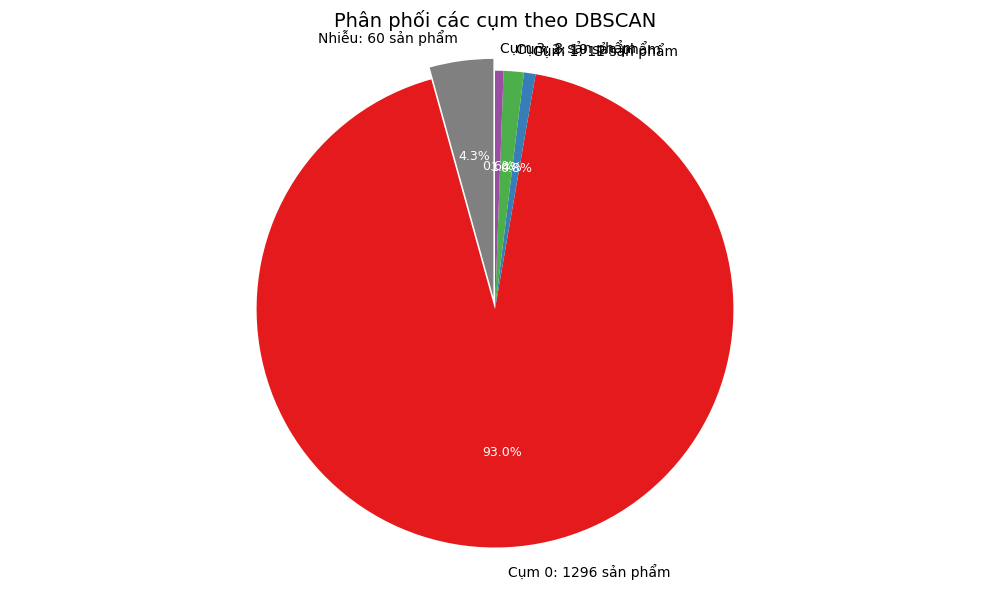


=== Bảng tóm tắt các cụm DBSCAN ===
       Số lượng sản phẩm  Phần trăm  Giá trung bình  Rating trung bình  \
Nhiễu                 60        4.3            1.95               4.21   
Cụm 0               1296       93.0           -0.15               4.08   
Cụm 1                 11        0.8           -0.36               4.15   
Cụm 2                 19        1.4            4.13               4.19   
Cụm 3                  8        0.6           -0.18               4.08   

       Số đánh giá trung bình                     Danh mục chính  
Nhiễu                     2.0                Electronics (76.7%)  
Cụm 0                    -0.0  Computers and Accessories (33.7%)  
Cụm 1                     4.0                Electronics (54.5%)  
Cụm 2                    -0.0                Electronics (84.2%)  
Cụm 3                     3.0               Electronics (100.0%)  


In [594]:
# Phân tích đặc trưng của từng cụm
print("\n=== Đặc trưng của từng cụm DBSCAN ===")

# Thêm nhãn cụm vào dữ liệu gốc
df_with_clusters = df_processed.copy()
df_with_clusters['dbscan_cluster'] = dbscan_labels

# Tính toán giá trị trung bình của các đặc trưng quan trọng theo cụm
cluster_features = df_with_clusters.groupby('dbscan_cluster')[
    ['discounted_price', 'actual_price', 'rating', 'rating_count', 'discount_percentage']
].mean().round(2)

print("\nGiá trị trung bình của các đặc trưng theo cụm:")
print(cluster_features)

# Tính median để hiểu rõ hơn về phân phối trong các cụm (vì mean có thể bị ảnh hưởng bởi outliers)
cluster_features_median = df_with_clusters.groupby('dbscan_cluster')[
    ['discounted_price', 'actual_price', 'rating', 'rating_count', 'discount_percentage']
].median().round(2)

print("\nGiá trị trung vị của các đặc trưng theo cụm:")
print(cluster_features_median)

# Phân tích phân phối danh mục trong từng cụm
category_distribution = pd.crosstab(
    df_with_clusters['dbscan_cluster'], 
    df_with_clusters['main_category'], 
    normalize='index'
) * 100

print("\nPhân phối danh mục trong từng cụm (%):")
print(category_distribution.round(1))

# Tìm top danh mục trong mỗi cụm
for cluster_id in sorted(df_with_clusters['dbscan_cluster'].unique()):
    if cluster_id == -1:
        cluster_name = "Nhiễu"
    else:
        cluster_name = f"Cụm {cluster_id}"
        
    print(f"\nTop 3 danh mục trong {cluster_name}:")
    if cluster_id in category_distribution.index:
        top_categories = category_distribution.loc[cluster_id].nlargest(3)
        for category, percentage in zip(top_categories.index, top_categories.values):
            print(f"- {category}: {percentage:.1f}%")

# Vẽ biểu đồ tròn thể hiện phân phối cụm
plt.figure(figsize=(10, 6))
cluster_counts = df_with_clusters['dbscan_cluster'].value_counts().sort_index()

# Tạo nhãn có ý nghĩa
labels = []
for idx in cluster_counts.index:
    if idx == -1:
        labels.append(f'Nhiễu: {cluster_counts[idx]} sản phẩm')
    else:
        labels.append(f'Cụm {idx}: {cluster_counts[idx]} sản phẩm')

# Màu sắc đồng bộ với biểu đồ scatter
colors = []
for idx in cluster_counts.index:
    if idx in cluster_colors:
        colors.append(cluster_colors[idx])
    else:
        colors.append('gray')  # Fallback nếu không tìm thấy màu

# Vẽ biểu đồ tròn
wedges, texts, autotexts = plt.pie(
    cluster_counts, 
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0.05 if i == -1 else 0 for i in cluster_counts.index]  # Tách biệt phần nhiễu
)

# Điều chỉnh font chữ
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_color('white')

plt.axis('equal')
plt.title('Phân phối các cụm theo DBSCAN', fontsize=14)
plt.tight_layout()
plt.show()

# Biểu đồ radar để so sánh đặc trưng giữa các cụm
def radar_chart(df, cluster_col, feature_cols, cluster_names=None):
    # Số đặc trưng
    N = len(feature_cols)
    
    # Chuẩn hóa đặc trưng về thang [0, 1] cho biểu đồ radar
    df_scaled = df.copy()
    for col in feature_cols:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:  # Tránh chia cho 0
            df_scaled[col] = (df[col] - min_val) / (max_val - min_val)
    
    # Tính giá trị trung bình theo cụm
    cluster_means = df_scaled.groupby(cluster_col)[feature_cols].mean()
    
    # Lọc bỏ cụm nhiễu nếu cần
    if -1 in cluster_means.index and cluster_means.shape[0] > 1:
        cluster_means = cluster_means.drop(-1)
    
    # Góc của mỗi trục trong biểu đồ radar
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Đóng vòng tròn
    
    # Vẽ biểu đồ
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Thêm nhãn cho các trục
    plt.xticks(angles[:-1], feature_cols, color='black', size=12)
    
    # Vẽ đường kẻ từ tâm đến viền
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=10)
    plt.ylim(0, 1)
    
    # Màu sắc cho mỗi cụm - đồng bộ với biểu đồ scatter
    if cluster_names is None:
        cluster_names = {}
        for i in cluster_means.index:
            if i == -1:
                cluster_names[i] = 'Nhiễu'
            else:
                cluster_names[i] = f'Cụm {i}'
    
    # Vẽ dữ liệu cho từng cụm
    for i, (idx, row) in enumerate(cluster_means.iterrows()):
        values = row.values.tolist()
        values += values[:1]  # Đóng vòng tròn
        
        # Lấy màu từ biểu đồ scatter
        color = cluster_colors.get(idx, 'blue')
        
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=cluster_names[idx], color=color)
        ax.fill(angles, values, color, alpha=0.1)
    
    # Thêm chú thích
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
    plt.title('So sánh đặc trưng giữa các cụm DBSCAN', size=16, y=1.1)
    
    return fig, ax



# Tạo bảng so sánh tóm tắt các cụm
cluster_summary = pd.DataFrame(index=sorted(df_with_clusters['dbscan_cluster'].unique()))

# Thêm số lượng sản phẩm
cluster_summary['Số lượng sản phẩm'] = df_with_clusters['dbscan_cluster'].value_counts().sort_index()

# Thêm phần trăm
total_products = len(df_with_clusters)
cluster_summary['Phần trăm'] = (cluster_summary['Số lượng sản phẩm'] / total_products * 100).round(1)

# Thêm giá trung bình
cluster_summary['Giá trung bình'] = df_with_clusters.groupby('dbscan_cluster')['discounted_price'].mean().round(2)

# Thêm rating trung bình
cluster_summary['Rating trung bình'] = df_with_clusters.groupby('dbscan_cluster')['rating'].mean().round(2)

# Thêm số lượng đánh giá trung bình
cluster_summary['Số đánh giá trung bình'] = df_with_clusters.groupby('dbscan_cluster')['rating_count'].mean().round(0)

# Thêm danh mục chính
top_categories = {}
for cluster_id in cluster_summary.index:
    if cluster_id in category_distribution.index:
        top_category = category_distribution.loc[cluster_id].idxmax()
        percentage = category_distribution.loc[cluster_id].max()
        top_categories[cluster_id] = f"{top_category} ({percentage:.1f}%)"
    else:
        top_categories[cluster_id] = "N/A"

cluster_summary['Danh mục chính'] = pd.Series(top_categories)

# Đổi tên chỉ mục
cluster_summary = cluster_summary.rename(index={-1: 'Nhiễu'})
for idx in cluster_summary.index:
    if idx != 'Nhiễu':
        cluster_summary = cluster_summary.rename(index={idx: f'Cụm {idx}'})

print("\n=== Bảng tóm tắt các cụm DBSCAN ===")
print(cluster_summary)

Nhận xét về đặc trưng các cụm DBSCAN
Phân tích tổng quan về các cụm
DBSCAN đã phân loại dữ liệu thành 4 cụm riêng biệt và một nhóm nhiễu, mỗi cụm có đặc điểm riêng rõ rệt:

1. Cụm 0: "Phân khúc phổ thông đa dạng"
Giá cả: Thấp hơn trung bình (-0.15 độ lệch chuẩn)
Đánh giá: Xấp xỉ trung bình (-0.02)
Số lượng đánh giá: Thấp hơn trung bình (-0.16)
Danh mục: Phân bố khá đồng đều giữa Computers (33.7%), Home & Kitchen (33.6%), và Electronics (29.7%)
Đặc điểm nổi bật: Đây là cụm lớn nhất, đại diện cho phân khúc phổ thông với sự đa dạng về danh mục sản phẩm
2. Cụm 1: "Bestsellers phổ thông"
Giá cả: Thấp hơn trung bình đáng kể (-0.36)
Đánh giá: Cao hơn trung bình (0.21)
Số lượng đánh giá: Rất cao (3.78 độ lệch chuẩn)
Danh mục: Tập trung vào Electronics (54.5%) và Computers (45.5%)
Đặc điểm nổi bật: Sản phẩm giá rẻ nhưng rất phổ biến, có nhiều đánh giá - đại diện cho bestsellers phổ thông
3. Cụm 2: "Sản phẩm cao cấp/Luxury"
Giá cả: Cực kỳ cao (4.13 độ lệch chuẩn)
Đánh giá: Cao hơn trung bình (0.33)
Giảm giá: Thấp nhất (-0.68), ít khuyến mãi
Danh mục: Chủ yếu là Electronics (84.2%)
Đặc điểm nổi bật: Sản phẩm cao cấp với mức giá đắt đỏ, ít được giảm giá, chủ yếu là thiết bị điện tử premium
4. Cụm 3: "Bestsellers Electronics"
Giá cả: Thấp hơn trung bình (-0.18)
Đánh giá: Thấp hơn trung bình (-0.05)
Số lượng đánh giá: Rất cao (2.64 độ lệch chuẩn)
Danh mục: Độc quyền Electronics (100%)
Đặc điểm nổi bật: Sản phẩm Electronics phổ biến, nhiều người đánh giá, giá cả phải chăng
5. Nhiễu (-1): "Sản phẩm đặc biệt/khó phân loại"
Giá cả: Cao hơn trung bình (1.95 độ lệch chuẩn)
Đánh giá: Cao hơn trung bình (0.40)
Số lượng đánh giá: Cao hơn trung bình (2.47)
Danh mục: Chủ yếu là Electronics (76.7%)
Đặc điểm nổi bật: Sản phẩm đặc biệt, không phù hợp với bất kỳ cụm nào - có thể là sản phẩm đặc thù, mới ra mắt hoặc có đặc điểm khác biệt
Nhận xét về phân phối danh mục
Electronics chiếm ưu thế trong hầu hết các cụm:

Độc quyền trong Cụm 3 (100%)
Chiếm đa số trong Cụm 2 (84.2%) và Nhiễu (76.7%)
Hiện diện đáng kể trong Cụm 0 (29.7%) và Cụm 1 (54.5%)
Computers and Accessories:

Hiện diện mạnh trong Cụm 1 (45.5%) và Cụm 0 (33.7%)
Hoàn toàn không xuất hiện trong Cụm 2 và Cụm 3
Home and Kitchen:

Chiếm tỷ lệ cao trong Cụm 0 (33.6%)
Hiện diện trong Cụm 2 (15.8%) và Nhiễu (8.3%)
Các danh mục khác (Car and Motorbike, Health and PersonalCare, etc.):

Hiện diện rất ít hoặc không hiện diện trong các cụm
Tập trung chủ yếu ở Cụm 0, cụm đa dạng nhất
Ý nghĩa thị trường
Phân khúc phổ thông đa dạng (Cụm 0):

Chiếm phần lớn thị trường Amazon
Mục tiêu: Người tiêu dùng đại chúng
Chiến lược: Đa dạng sản phẩm, giá cả hợp lý
Bestsellers phổ thông (Cụm 1):

Sản phẩm công nghệ giá rẻ nhưng rất phổ biến
Mục tiêu: Người tiêu dùng thông thái, tìm kiếm sự tối ưu
Chiến lược: Tận dụng đánh giá tích cực, marketing đại chúng
Sản phẩm cao cấp/Luxury (Cụm 2):

Phân khúc cao cấp rõ rệt với giá cao gấp 4 lần trung bình
Mục tiêu: Người tiêu dùng cao cấp, ít nhạy cảm với giá
Chiến lược: Tập trung vào chất lượng, trải nghiệm cao cấp
Bestsellers Electronics (Cụm 3):

Phân khúc thiết bị điện tử phổ biến
Mục tiêu: Người tiêu dùng quan tâm đến thiết bị điện tử giá rẻ
Chiến lược: Tận dụng số lượng đánh giá lớn, xây dựng niềm tin
DBSCAN đã thành công trong việc phát hiện các phân khúc thị trường tự nhiên, mỗi phân khúc có đặc điểm riêng về giá cả, đánh giá và danh mục sản phẩm. Điều này cung cấp cái nhìn sâu sắc về cấu trúc thị trường Amazon và giúp xác định các chiến lược marketing phù hợp cho từng phân khúc.

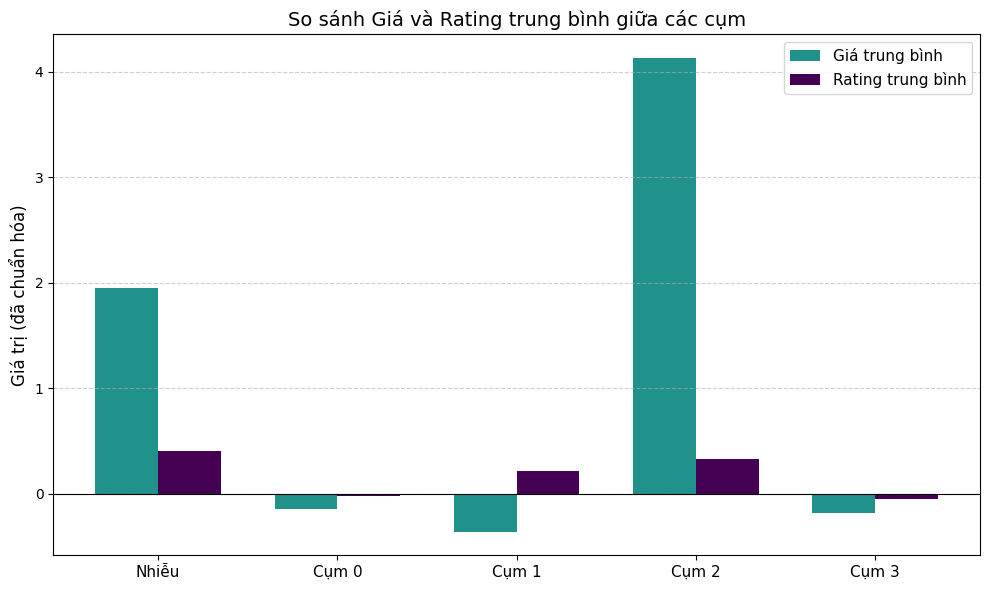

In [595]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu từ bảng
clusters = ['Nhiễu', 'Cụm 0', 'Cụm 1', 'Cụm 2', 'Cụm 3']
price_avg = [1.95, -0.15, -0.36, 4.13, -0.18]
rating_avg = [0.40, -0.02, 0.21, 0.33, -0.05]

# Vị trí và thông số trục
x = np.arange(len(clusters))
width = 0.35

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, price_avg, width, label='Giá trung bình', color='#21918c')
bars2 = ax.bar(x + width/2, rating_avg, width, label='Rating trung bình', color='#440154')

# Gắn nhãn và định dạng
ax.set_ylabel('Giá trị (đã chuẩn hóa)', fontsize=12)
ax.set_title('So sánh Giá và Rating trung bình giữa các cụm', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(clusters, fontsize=11)
ax.axhline(0, color='black', linewidth=0.8)  # Đường gạch 0

# Thêm chú thích và lưới
ax.legend(fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


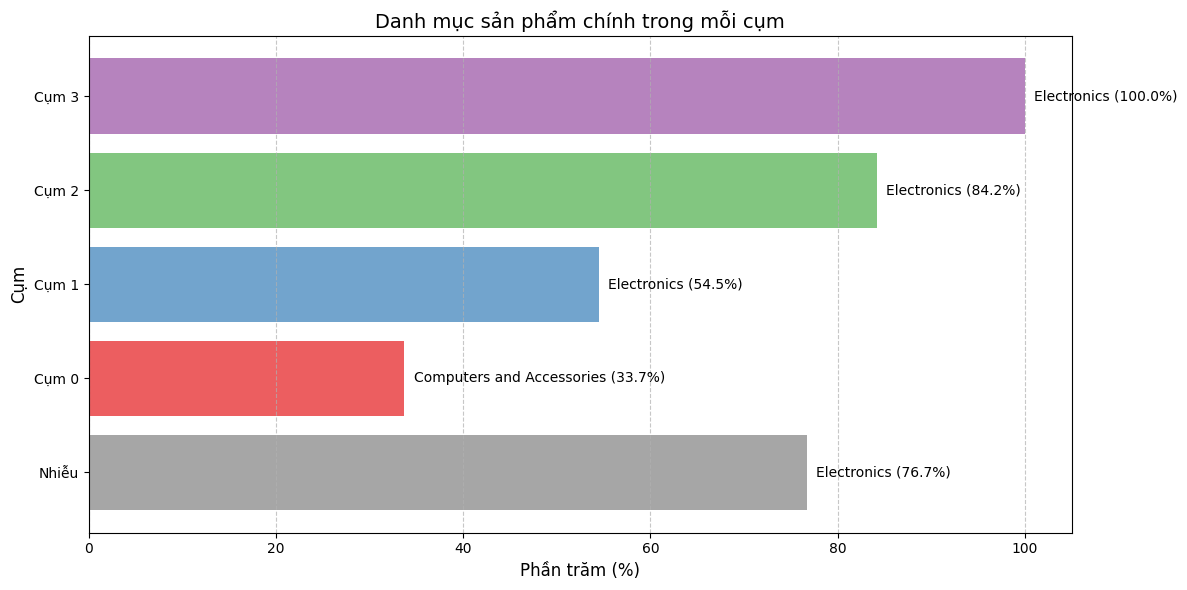

In [596]:
# Danh mục chính theo cụm
categories = [
    'Electronics (76.7%)', 
    'Computers and Accessories (33.7%)', 
    'Electronics (54.5%)', 
    'Electronics (84.2%)', 
    'Electronics (100.0%)'
]

# Cắt bớt tên danh mục cho ngắn gọn
categories_short = [cat.split(' (')[0] for cat in categories]
percentages_cat = [76.7, 33.7, 54.5, 84.2, 100.0]

plt.figure(figsize=(12, 6))
bars = plt.barh(clusters, percentages_cat, color=colors, alpha=0.7)

# Thêm giá trị phần trăm và tên danh mục
for i, (bar, cat) in enumerate(zip(bars, categories_short)):
    plt.text(
        bar.get_width() + 1, 
        bar.get_y() + bar.get_height()/2, 
        f"{cat} ({percentages_cat[i]}%)",
        va='center',
        fontsize=10
    )

plt.xlim(0, 105)
plt.title('Danh mục sản phẩm chính trong mỗi cụm', fontsize=14)
plt.xlabel('Phần trăm (%)', fontsize=12)
plt.ylabel('Cụm', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [597]:
print(df_processed['rating'])

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460    4.0
1461    4.1
1462    3.6
1463    4.0
1464    4.3
Name: rating, Length: 1394, dtype: float64


Ánh xạ các mức độ hài lòng:
Hài lòng: 0
Không hài lòng: 1
Rất hài lòng: 2
Trung lập: 3


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_31 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_31         │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.4121 - loss: 1.2462 - val_accuracy: 0.5448 - val_loss: 0.8442
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5875 - loss: 0.7778 - val_accuracy: 0.5448 - val_loss: 0.8047
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6705 - loss: 0.6326 - val_accuracy: 0.5484 - val_loss: 0.8031
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7475 - loss: 0.5511 - val_accuracy: 0.5556 - val_loss: 0.7946
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8643 - loss: 0.3933 - val_accuracy: 0.5735 - val_loss: 0.8039
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9549 - loss: 0.2457
Loss: 0.3594, Accuracy: 0.8831

Phân phối mức độ hài lòng:
satisfaction
Rất hài lòng      870
Hài lòng          514
Trung lập           9
Không hài lòng      1
Name: count, dtype: int64
Tỷ lệ phần trăm: satisfaction
Rất hài lòng      62.410330
Hài lòng          36.872310
Trung lập          0.6456

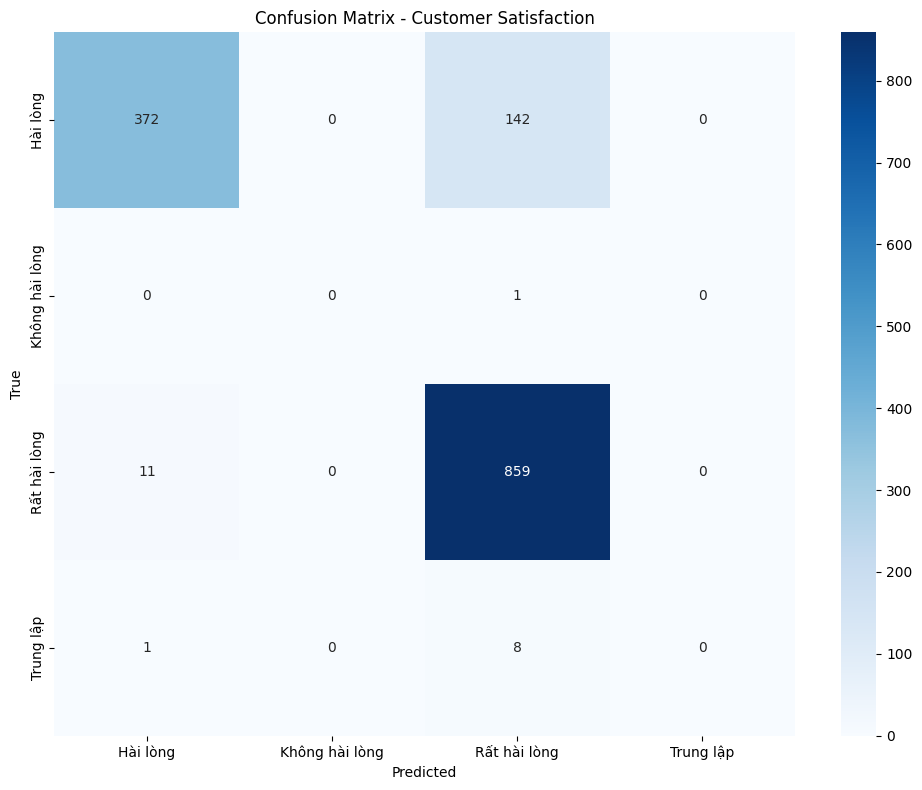


Báo cáo phân loại:
                precision    recall  f1-score   support

      Hài lòng       0.97      0.72      0.83       514
Không hài lòng       0.00      0.00      0.00         1
  Rất hài lòng       0.85      0.99      0.91       870
     Trung lập       0.00      0.00      0.00         9

      accuracy                           0.88      1394
     macro avg       0.45      0.43      0.44      1394
  weighted avg       0.89      0.88      0.88      1394



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [598]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Tiền xử lý văn bản
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_processed['review_content'])
sequences = tokenizer.texts_to_sequences(df_processed['review_content'])
X = pad_sequences(sequences, maxlen=max_len)

# Tạo nhãn mức độ hài lòng dựa trên rating
def create_satisfaction_label(rating):
    rating = float(rating)
    if rating <= 1.0:
        return 'Rất không hài lòng'
    elif rating <= 2.0:
        return 'Không hài lòng'
    elif rating <= 3.0:
        return 'Trung lập'
    elif rating <= 4.0:
        return 'Hài lòng'
    else:
        return 'Rất hài lòng'

# Áp dụng hàm gán nhãn
df_processed['satisfaction'] = df_processed['rating'].apply(create_satisfaction_label)

# Mã hóa nhãn mức độ hài lòng
label_encoder = LabelEncoder()
encoded_satisfaction = label_encoder.fit_transform(df_processed['satisfaction'])
y_satisfaction = tf.keras.utils.to_categorical(encoded_satisfaction)
num_satisfaction_classes = len(label_encoder.classes_)

# In ra ánh xạ giữa các lớp và mã hóa
satisfaction_mapping = dict(zip(label_encoder.classes_, range(num_satisfaction_classes)))
print("Ánh xạ các mức độ hài lòng:")
for label, code in satisfaction_mapping.items():
    print(f"{label}: {code}")

# Tạo mô hình CNN cho phân loại mức độ hài lòng
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_satisfaction_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Huấn luyện mô hình
history = model.fit(X, y_satisfaction, epochs=5, batch_size=64, validation_split=0.2)

# Đánh giá mô hình
loss, accuracy = model.evaluate(X, y_satisfaction)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Kiểm tra phân phối các mức độ hài lòng
satisfaction_counts = df_processed['satisfaction'].value_counts()
print("\nPhân phối mức độ hài lòng:")
print(satisfaction_counts)
print(f"Tỷ lệ phần trăm: {satisfaction_counts / len(df_processed) * 100}")

# Dự đoán mức độ hài lòng cho các đánh giá mới
new_reviews = [
    "This product exceeded my expectations. The quality is outstanding and I would definitely recommend it to anyone!",
    "It's okay but not worth the price. The product functions as expected but could be better for what I paid.",
    "Terrible product, broke after one week. Customer service was unhelpful and I wasted my money. Would not recommend."
]
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_X = pad_sequences(new_sequences, maxlen=max_len)

# Dự đoán với mô hình
predictions = model.predict(new_X)
predicted_classes = predictions.argmax(axis=1)
predicted_satisfaction = label_encoder.inverse_transform(predicted_classes)

# Hiển thị kết quả với xác suất cho mỗi mức độ hài lòng
print("\nKết quả dự đoán mức độ hài lòng:")
for i, review in enumerate(new_reviews):
    print(f"Review: {review[:50]}...")
    print(f"Predicted satisfaction: {predicted_satisfaction[i]}")
    
    # Hiển thị xác suất của tất cả các mức độ
    print("Probabilities:")
    for j, satisfaction_level in enumerate(label_encoder.classes_):
        print(f"  {satisfaction_level}: {predictions[i][j]:.2f}")
    print()

# Phân tích ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Dự đoán trên toàn bộ tập dữ liệu
y_pred = model.predict(X).argmax(axis=1)
y_true = encoded_satisfaction

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_true, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Customer Satisfaction')
plt.tight_layout()
plt.show()

# In báo cáo phân loại
print("\nBáo cáo phân loại:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

In [601]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input
from sklearn.preprocessing import normalize

class SimpleRecommender:
    def __init__(self, df, cluster_column='dbscan_cluster'):
        self.df = df
        self.cluster_column = cluster_column
        
        print("Đang tạo embedding cho đánh giá...")
        self.create_review_embeddings()
        
        print("Đang tạo đặc trưng sản phẩm...")
        self.create_product_features()
        
        print("Hệ thống đề xuất đã sẵn sàng!")
        
    def create_review_embeddings(self):
        # Tiền xử lý đánh giá
        tokenizer = Tokenizer(num_words=5000)
        tokenizer.fit_on_texts(self.df['review_content'])
        sequences = tokenizer.texts_to_sequences(self.df['review_content'])
        X = pad_sequences(sequences, maxlen=100)
        
        # Lưu tokenizer
        self.tokenizer = tokenizer
        
        # Tạo mô hình CNN đơn giản sử dụng Functional API
        input_layer = Input(shape=(100,))
        embedding_layer = Embedding(5000, 64, input_length=100)(input_layer)
        conv_layer = Conv1D(64, 5, activation='relu')(embedding_layer)
        pooling_layer = GlobalMaxPooling1D()(conv_layer)
        output_layer = Dense(32, activation='relu')(pooling_layer)
        
        # Tạo và biên dịch model
        full_model = Model(inputs=input_layer, outputs=output_layer)
        full_model.compile(optimizer='adam', loss='mse')
        
        # Tạo embedding model
        self.embedding_model = full_model
        
        # Tạo embedding cho các review
        print("Đang tính toán embedding cho đánh giá...")
        self.review_embeddings = self.embedding_model.predict(X)
        
        # Reset indices để đảm bảo tương ứng với review_embeddings
        self.df_review_indexed = self.df.reset_index(drop=True)
        
        # Tạo embedding cho sản phẩm (trung bình của review)
        self.product_embeddings = {}
        for pid in self.df['product_id'].unique():
            # Lấy indices của review trong DataFrame đã reset index
            review_indices = self.df_review_indexed[self.df_review_indexed['product_id'] == pid].index.tolist()
            if len(review_indices) > 0:
                # Kiểm tra xem chỉ số có nằm trong phạm vi không
                valid_indices = [i for i in review_indices if i < len(self.review_embeddings)]
                if valid_indices:
                    # Tính trung bình embedding của review
                    product_emb = np.mean([self.review_embeddings[i] for i in valid_indices], axis=0)
                    self.product_embeddings[pid] = product_emb
    
    def create_product_features(self):
        # Tạo dict ánh xạ product_id -> index
        self.product_ids = list(self.df['product_id'].unique())
        self.product_to_idx = {pid: i for i, pid in enumerate(self.product_ids)}
        
        # Tạo ma trận cluster (one-hot)
        unique_clusters = sorted(self.df[self.cluster_column].unique())
        n_clusters = len(unique_clusters)
        self.cluster_features = np.zeros((len(self.product_ids), n_clusters))
        
        # Tạo ánh xạ từ cluster_id -> index
        cluster_to_idx = {cluster: i for i, cluster in enumerate(unique_clusters)}
        
        for pid in self.product_ids:
            if pid in self.product_to_idx:  # Kiểm tra để chắc chắn
                idx = self.product_to_idx[pid]
                product_rows = self.df[self.df['product_id'] == pid]
                if not product_rows.empty:
                    cluster = product_rows[self.cluster_column].iloc[0]
                    if cluster in cluster_to_idx:  # Kiểm tra cluster có trong ánh xạ
                        cluster_idx = cluster_to_idx[cluster]
                        self.cluster_features[idx, cluster_idx] = 1
        
        # Tạo ma trận embedding
        if not self.product_embeddings:
            print("Không có embedding cho sản phẩm!")
            return
            
        embedding_dim = next(iter(self.product_embeddings.values())).shape[0]
        self.embedding_features = np.zeros((len(self.product_ids), embedding_dim))
        
        for pid, emb in self.product_embeddings.items():
            if pid in self.product_to_idx:
                idx = self.product_to_idx[pid]
                self.embedding_features[idx] = emb
        
        # Chuẩn hóa các ma trận đặc trưng
        self.cluster_features = normalize(self.cluster_features, norm='l2', axis=1)
        self.embedding_features = normalize(self.embedding_features, norm='l2', axis=1)
        
        # Tạo ma trận kết hợp theo kích thước
        print(f"Kích thước embedding: {self.embedding_features.shape}")
        print(f"Kích thước cluster: {self.cluster_features.shape}")
        
        # Không kết hợp trực tiếp nếu số chiều khác nhau - thay vào đó tính tương đồng riêng
        self.combined_features = self.embedding_features
    
    def recommend(self, product_id, top_n=5):
        """Đề xuất sản phẩm tương tự"""
        if product_id not in self.product_to_idx:
            return [{"error": "Sản phẩm không tồn tại"}]
        
        # Lấy index của sản phẩm
        idx = self.product_to_idx[product_id]
        
        # Tính độ tương đồng embedding
        emb_similarities = cosine_similarity([self.embedding_features[idx]], self.embedding_features)[0]
        
        # Tính độ tương đồng cluster
        clus_similarities = cosine_similarity([self.cluster_features[idx]], self.cluster_features)[0]
        
        # Kết hợp độ tương đồng với trọng số
        similarities = 0.5 * emb_similarities + 0.5 * clus_similarities
        
        # Sắp xếp theo độ tương đồng (bỏ qua sản phẩm gốc)
        product_scores = [(i, similarities[i]) for i in range(len(similarities)) if i != idx]
        product_scores.sort(key=lambda x: x[1], reverse=True)
        top_indices = [i for i, _ in product_scores[:top_n]]
        
        # Lấy thông tin sản phẩm
        recommendations = []
        for i in top_indices:
            if i < len(self.product_ids):  # Kiểm tra index trong giới hạn
                pid = self.product_ids[i]
                product_rows = self.df[self.df['product_id'] == pid]
                if not product_rows.empty:
                    product = product_rows.iloc[0]
                    recommendations.append({
                        'product_id': pid,
                        'product_name': product['product_name'],
                        'category': product['category'],  # Thay 'main_category' bằng 'category' nếu cần
                        'price': product['discounted_price'],
                        'rating': float(product['rating']),
                        'similarity': similarities[i]
                    })
        
        return recommendations
    
    def recommend_by_cluster(self, cluster_id, top_n=5):
        """Đề xuất sản phẩm hàng đầu trong cụm"""
        # Lọc sản phẩm theo cụm
        cluster_products = self.df[self.df[self.cluster_column] == cluster_id]
        
        if cluster_products.empty:
            return pd.DataFrame({"error": ["Không có sản phẩm nào trong cụm này"]})
        
        # Sắp xếp theo rating và rating_count
        cluster_products['rating_float'] = cluster_products['rating'].astype(float)
        cluster_products['rating_count_float'] = cluster_products['rating_count'].astype(float)
        
        top_products = cluster_products.sort_values(
            by=['rating_float', 'rating_count_float'], 
            ascending=[False, False]
        ).drop_duplicates('product_id').head(top_n)
        
        columns_to_select = ['product_id', 'product_name', 'category', 'discounted_price', 'rating']
        # Đảm bảo tất cả cột tồn tại
        available_columns = [col for col in columns_to_select if col in top_products.columns]
        
        return top_products[available_columns]
    
    def analyze_review_sentiment(self, review_text):
        """Phân tích cảm xúc của đánh giá mới"""
        # Tiền xử lý đánh giá
        sequences = self.tokenizer.texts_to_sequences([review_text])
        X = pad_sequences(sequences, maxlen=100)
        
        # Tạo embedding
        review_embedding = self.embedding_model.predict(X)[0]
        
        # Tìm sản phẩm có đánh giá tương tự
        similarities = []
        for pid, emb in self.product_embeddings.items():
            sim = cosine_similarity([review_embedding], [emb])[0][0]
            similarities.append((pid, sim))
        
        # Sắp xếp theo độ tương đồng
        similarities.sort(key=lambda x: x[1], reverse=True)
        
        # Lấy top sản phẩm tương tự
        similar_products = []
        for pid, sim in similarities[:3]:
            product_rows = self.df[self.df['product_id'] == pid]
            if not product_rows.empty:
                product = product_rows.iloc[0]
                similar_products.append({
                    'product_id': pid,
                    'product_name': product['product_name'],
                    'rating': float(product['rating']),
                    'similarity': sim
                })
        
        return similar_products

def demo_recommender(df_processed):
    try:
        print("Đang khởi tạo hệ thống đề xuất...")
        
        # Đảm bảo cột chính đã tồn tại
        required_columns = ['product_id', 'product_name', 'review_content', 'rating', 'rating_count', 'discounted_price', 'dbscan_cluster']
        missing_columns = [col for col in required_columns if col not in df_processed.columns]
        
        if missing_columns:
            print(f"Thiếu các cột: {missing_columns}")
            return None
            
        # Đảm bảo không có giá trị NaN trong các cột quan trọng
        df_processed_clean = df_processed.dropna(subset=['review_content', 'product_id'])
        print(f"Số lượng dòng sau khi loại bỏ NaN: {len(df_processed_clean)}")
        
        recommender = SimpleRecommender(df_processed_clean)
        
        # Đề xuất sản phẩm tương tự
        product_id = df_processed_clean['product_id'].iloc[0]  # Lấy sản phẩm đầu tiên
        print(f"\nĐang tìm đề xuất cho sản phẩm {product_id}...")
        recommendations = recommender.recommend(product_id, top_n=5)
        
        print(f"\nĐề xuất cho sản phẩm {product_id}:")
        for rec in recommendations:
            if "error" in rec:
                print(f"Lỗi: {rec['error']}")
            else:
                print(f"- {rec['product_name']} (Rating: {rec['rating']:.2f}, Tương đồng: {rec['similarity']:.2f})")
        
        # Đề xuất sản phẩm trong cùng cụm
        cluster_id = df_processed_clean.loc[df_processed_clean['product_id'] == product_id, 'dbscan_cluster'].iloc[0]
        print(f"\nĐang tìm top sản phẩm trong cụm {cluster_id}...")
        top_cluster_products = recommender.recommend_by_cluster(cluster_id, top_n=5)
        
        print(f"\nTop sản phẩm trong cụm {cluster_id}:")
        if isinstance(top_cluster_products, pd.DataFrame):
            if 'error' in top_cluster_products.columns:
                print(top_cluster_products['error'].iloc[0])
            else:
                for _, product in top_cluster_products.iterrows():
                    print(f"- {product['product_name']} (Rating: {product['rating']})")
        
        # Phân tích cảm xúc đánh giá mới
        new_review = "This product is amazing! I love the quality and the price is unbeatable."
        print("\nĐang phân tích cảm xúc đánh giá mới...")
        sentiment_analysis = recommender.analyze_review_sentiment(new_review)
        
        print("\nPhân tích cảm xúc đánh giá mới:")
        for prod in sentiment_analysis:
            print(f"- {prod['product_name']} (Rating: {prod['rating']:.2f}, Tương đồng: {prod['similarity']:.2f})")
        
        return recommender
    except Exception as e:
        import traceback
        print(f"Có lỗi xảy ra trong quá trình chạy hệ thống đề xuất: {e}")
        traceback.print_exc()
        return None

# Chạy demo
print("Đang chuẩn bị dữ liệu...")
recommender = demo_recommender(df_processed)

Đang chuẩn bị dữ liệu...
Đang khởi tạo hệ thống đề xuất...
Số lượng dòng sau khi loại bỏ NaN: 1394
Đang tạo embedding cho đánh giá...
Đang tính toán embedding cho đánh giá...
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Đang tạo đặc trưng sản phẩm...
Kích thước embedding: (1280, 32)
Kích thước cluster: (1280, 5)
Hệ thống đề xuất đã sẵn sàng!

Đang tìm đề xuất cho sản phẩm B07JW9H4J1...

Đề xuất cho sản phẩm B07JW9H4J1:
- Wayona Nylon Braided 3A Lightning to USB A Syncing... (Rating: 4.20, Tương đồng: 1.00)
- Wayona Usb Nylon Braided Data Sync And Charging Ca... (Rating: 4.20, Tương đồng: 1.00)
- Wayona Nylon Braided 2 Pack Lightning Fast Usb Dat... (Rating: 4.20, Tương đồng: 1.00)
- Wayona Nylon Braided Usb Syncing And Charging Cabl... (Rating: 4.20, Tương đồng: 1.00)
- Wayona Nylon Braided 2M 6Ft Fast Charge Usb To Lig... (Rating: 4.20, Tương đồng: 1.00)

Đang tìm top sản phẩm trong cụm 0...

Top sản phẩm trong cụm 0:
- Amazon Basics Wireless Mouse 2 4 GHz Connection 16... (Rating: 5.0)
- S

C:\Users\HP\AppData\Local\Temp\ipykernel_18948\1484331422.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_products['rating_float'] = cluster_products['rating'].astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_18948\1484331422.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_products['rating_count_float'] = cluster_products['rating_count'].astype(float)



Phân tích cảm xúc đánh giá mới:
- pTron Solero MB301 3A Micro USB Data and Charging ... (Rating: 3.90, Tương đồng: 0.97)
- Portronics Toad 23 Wireless Optical Mouse with 2 4... (Rating: 4.10, Tương đồng: 0.97)
- Ambrane 60W 3A Fast Charging Output Cable with Typ... (Rating: 4.00, Tương đồng: 0.97)
